# Optimización de Gastos de Marketing en Y.Afisha
 Análisis de Datos de Visitas, Pedidos y Costos

## Introducción

En un mundo cada vez más digitalizado, comprender cómo los usuarios interactúan con un servicio en línea y cómo estas interacciones impactan en las decisiones de marketing es fundamental para el éxito de cualquier empresa. En este contexto, Y.Afisha, una plataforma de servicios en línea, busca mejorar la eficiencia de sus estrategias de marketing mediante un análisis exhaustivo de sus datos.

Y.Afisha, un servicio de venta de boletos de entretenimiento con sede en Rusia, ha proporcionado tres conjuntos de datos para el análisis del negocio de la compañía. Estos conjuntos de datos incluyen registros del servidor con datos sobre las visitas a Yandex.Afisha desde junio de 2017 hasta mayo de 2018, un archivo de volcado con todos los pedidos para el período, así como estadísticas de gastos de marketing.

Este proyecto se enfoca en el análisis de datos recopilados durante el periodo de enero de 2017 a diciembre de 2018, que abarcan registros de visitas al sitio web, datos de pedidos realizados y estadísticas de gastos en marketing. A través de este análisis, se pretende obtener insights clave sobre cómo los clientes utilizan el servicio, cuándo realizan sus primeras compras, cuánto contribuyen al ingreso total de la compañía y cuándo se alcanza el punto en que los ingresos cubren los costos de adquisición de clientes.

Los conjuntos de datos serán procesados para evitar o minimizar análisis sesgados, se realizará un análisis exploratorio de datos y se llevará a cabo un análisis de negocio para alcanzar algunas conclusiones. Este informe consistirá en lo siguiente:

A través del análisis de estos datos, se buscará obtener insights clave sobre el comportamiento de los clientes, su contribución al ingreso total de la compañía y el rendimiento de las estrategias de marketing. Esto permitirá proporcionar recomendaciones sólidas y fundamentadas a los expertos de marketing de Y.Afisha sobre dónde y cómo asignar sus recursos de manera más eficiente, maximizando así el retorno de inversión y la rentabilidad de las campañas de marketing.

### Importación de librerías

In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Cargar Datos

In [2]:
# Cargar los datos
visits = pd.read_csv('/datasets/visits_log_us.csv')
orders = pd.read_csv('/datasets/orders_log_us.csv')
costs = pd.read_csv('/datasets/costs_us.csv')


### Exploración de datos

In [3]:
def explorar_datos(datos, nombre):
    """Esta función proporciona información general sobre un conjunto de datos.
    
    Args:
    datos (DataFrame): El conjunto de datos a explorar.
    nombre (str): El nombre del conjunto de datos.
    """
    print(f"Exploración de datos para '{nombre}':")
    # Información general
    print('Información general del conjunto de datos:')
    print(datos.info())
    print()
    # Primeras filas
    print('Primeras cinco filas:')
    print(datos.head())
    print()
    # Descripción
    print('Descripción del conjunto de datos:')
    print(datos.describe())
    print()
    # Duplicados y valores faltantes
    print(f"Este conjunto de datos tiene {datos.duplicated().sum()} duplicados.")
    print()
    print('¿Cuántos valores faltantes tiene este conjunto de datos?')
    missing_values = datos.isna().sum()
    print(missing_values)
    print()
    # Porcentaje de valores faltantes
    print('¿Cuál es el porcentaje de valores faltantes?')
    print(missing_values / len(datos) * 100)
    print()

# Exploración de datos
explorar_datos(visits, 'visits')
explorar_datos(orders, 'orders')
explorar_datos(costs, 'costs')


Exploración de datos para 'visits':
Información general del conjunto de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
None

Primeras cinco filas:
    Device               End Ts  Source Id             Start Ts  \
0    touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1  desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2    touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
3  desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
4  desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   

                    Uid  
0  168792562

Para el conjunto de datos 'visits', notamos que consta de 359,400 registros y tiene cinco columnas: 'Device', 'End Ts', 'Source Id', 'Start Ts' y 'Uid'. Sin embargo, observamos que las columnas 'End Ts' y 'Start Ts' aún están en formato de objeto en lugar de formato de fecha y hora. Sería beneficioso convertir estas columnas al tipo de datos adecuado de fecha y hora para un análisis más efectivo. Además, no se encontraron valores duplicados ni faltantes en este conjunto de datos.

En el caso del conjunto de datos 'orders', contiene 50,415 registros y tres columnas: 'Buy Ts', 'Revenue' y 'Uid'. Similar al conjunto 'visits', la columna 'Buy Ts' también está en formato de objeto en lugar de formato de fecha y hora. Se recomienda convertir esta columna al tipo de datos de fecha y hora para un análisis más preciso. No se encontraron valores duplicados ni faltantes en este conjunto de datos.

Para el conjunto de datos 'costs', consta de 2,542 registros y tiene tres columnas: 'source_id', 'dt' y 'costs'. En este conjunto, la columna 'dt' también está en formato de objeto en lugar de formato de fecha y hora, lo que podría dificultar el análisis temporal. Se sugiere convertir esta columna al tipo de datos adecuado de fecha y hora. Al igual que los otros conjuntos de datos, no se encontraron valores duplicados ni faltantes aquí.

En resumen, para todos los conjuntos de datos, es recomendable convertir las columnas que representan fechas y horas al tipo de datos correcto para facilitar un análisis más efectivo. Además, no se identificaron problemas significativos de calidad de datos, como duplicados o valores faltantes, en ninguno de los conjuntos de datos. Sin embargo, es importante realizar una exploración más detallada y un análisis más profundo para comprender completamente los datos y extraer información relevante.

### Correcciones de tipos de datos

In [4]:
def preparar_datos(datos, columnas_fecha_hora):
    """Esta función prepara los datos realizando las siguientes operaciones:
    - Convierte los nombres de las columnas a minúsculas.
    - Cambia los espacios en los nombres de las columnas por guiones bajos.
    - Convierte las columnas de fecha y hora al tipo datetime.
    - Verifica la presencia de duplicados en el DataFrame.
    
    Args:
    datos (DataFrame): El conjunto de datos a procesar.
    columnas_fecha_hora (list): Una lista de nombres de columnas que contienen datos de fecha y hora.
    
    Returns:
    DataFrame: El conjunto de datos procesado.
    """
    # Convertir nombres de columnas a minúsculas y cambiar espacios por guiones bajos
    datos.columns = datos.columns.str.lower().str.replace(' ', '_')
    
    # Convertir columnas de fecha y hora a tipo datetime
    for columna in columnas_fecha_hora:
        try:
            datos[columna] = pd.to_datetime(datos[columna], format="%Y-%m-%d %H:%M:%S")
        except Exception as e:
            print(f"Error al convertir la columna {columna}: {str(e)}")
    
    # Verificar duplicados
    if datos.duplicated().any():
        print("¡Advertencia! Se encontraron duplicados en el DataFrame.")
    
    return datos

# Lista de columnas que contienen datos de fecha y hora
columnas_fecha_hora_visits = ['end_ts', 'start_ts']
columnas_fecha_hora_orders = ['buy_ts']
columnas_fecha_hora_costs = ['dt']

# Aplicar la función a cada conjunto de datos
visits = preparar_datos(visits, columnas_fecha_hora_visits)
orders = preparar_datos(orders, columnas_fecha_hora_orders)
costs = preparar_datos(costs, columnas_fecha_hora_costs)

# Calcular la duración de cada sesión en segundos
visits['duration_seconds'] = (visits['end_ts'] - visits['start_ts']).dt.seconds

# Calcular el porcentaje de sesiones con una duración de 0 segundos
zero_duration_percentage = (visits['duration_seconds'] == 0).mean() * 100

print(f"Porcentaje de sesiones con una duración de 0 segundos: {zero_duration_percentage:.2f}%")

# Verificar los nombres de columnas y los tipos de datos actualizados
print("Nombres de columnas en 'visits' después de la preparación:")
print(visits.columns)
print("\nTipos de datos en 'visits' después de la preparación:")
print(visits.dtypes)

print("\nNombres de columnas en 'orders' después de la preparación:")
print(orders.columns)
print("\nTipos de datos en 'orders' después de la preparación:")
print(orders.dtypes)

print("\nNombres de columnas en 'costs' después de la preparación:")
print(costs.columns)
print("\nTipos de datos en 'costs' después de la preparación:")
print(costs.dtypes)


Porcentaje de sesiones con una duración de 0 segundos: 9.96%
Nombres de columnas en 'visits' después de la preparación:
Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid', 'duration_seconds'], dtype='object')

Tipos de datos en 'visits' después de la preparación:
device                      object
end_ts              datetime64[ns]
source_id                    int64
start_ts            datetime64[ns]
uid                         uint64
duration_seconds             int64
dtype: object

Nombres de columnas en 'orders' después de la preparación:
Index(['buy_ts', 'revenue', 'uid'], dtype='object')

Tipos de datos en 'orders' después de la preparación:
buy_ts     datetime64[ns]
revenue           float64
uid                uint64
dtype: object

Nombres de columnas en 'costs' después de la preparación:
Index(['source_id', 'dt', 'costs'], dtype='object')

Tipos de datos en 'costs' después de la preparación:
source_id             int64
dt           datetime64[ns]
costs               float

Después de realizar las correcciones de tipos de datos en los conjuntos de datos de 'visits', 'orders' y 'costs', se observaron algunos problemas durante la conversión de las columnas de fecha y hora. Específicamente, las columnas 'end ts' y 'start ts' en el conjunto de datos 'visits' y la columna 'buy ts' en el conjunto de datos 'orders' presentaron errores durante la conversión. Esto indica que puede haber problemas con el formato de estas columnas que deben ser investigados y abordados. Sin embargo, las conversiones de columnas de fecha y hora en el conjunto de datos 'costs' se realizaron con éxito. Además, se pudo observar que los nombres de las columnas fueron convertidos a minúsculas y los espacios fueron reemplazados por guiones bajos en todos los conjuntos de datos, lo que facilita el acceso a las columnas y el análisis posterior. 

### Distribución de Dispositivos de Acceso al Sitio Web

In [5]:
def contar_valores_columna(datos, columna):
    """Esta función cuenta los valores únicos en una columna específica del DataFrame.
    
    Args:
    datos (DataFrame): El DataFrame que contiene los datos.
    columna (str): El nombre de la columna de la que se contarán los valores únicos.
    
    Returns:
    Series: Una serie que contiene el recuento de valores únicos en la columna especificada.
    """
    return datos[columna].value_counts()

# Obtener el recuento de valores únicos en la columna 'device' de visits
recuento_dispositivos = contar_valores_columna(visits, 'device')
print(recuento_dispositivos)


desktop    262567
touch       96833
Name: device, dtype: int64


## Informes y cálculo de métricas
En esta sección, vamos a analizar las sesiones y actividades de los usuarios en Yandex Afisha. Calcularemos métricas como:
- La cantidad de usuarios que utilizan el servicio diariamente, semanalmente y mensualmente.
- La cantidad de sesiones por usuario en cada período de tiempo y la duración de esas sesiones. 
- La frecuencia con la que los usuarios regresan al servicio.

### Visitas diarias, semanales y mensuales

In [6]:
def calcular_usuarios_activos(datos, periodo):
    """Calcula el número promedio de usuarios activos según el periodo especificado.
    
    Args:
    datos (DataFrame): El DataFrame que contiene los datos de visitas.
    periodo (str): El periodo de tiempo ('D' para diario, 'W' para semanal, 'M' para mensual).
    
    Returns:
    int: El número promedio de usuarios activos.
    """
    # Crear nueva columna para el periodo especificado
    datos['periodo'] = datos['start_ts'].astype(f'datetime64[{periodo}]')
    
    # Calcular el número promedio de usuarios activos
    usuarios_activos = (
        datos.groupby(['periodo'])  # Agrupa por el periodo especificado
        .agg({'uid': 'nunique'})    # Cuenta usuarios únicos
        .mean()                     # Calcula el promedio
    )
    
    return int(usuarios_activos)

# Calcular DAU (Usuarios Activos Diarios)
dau = calcular_usuarios_activos(visits, 'D')

# Calcular WAU (Usuarios Activos Semanales)
wau = calcular_usuarios_activos(visits, 'W')

# Calcular MAU (Usuarios Activos Mensuales)
mau = calcular_usuarios_activos(visits, 'M')

# Imprimir resultados
print('Usuarios promedio por día:', dau)
print('Usuarios promedio por semana:', wau)
print('Usuarios promedio por mes:', mau)


Usuarios promedio por día: 907
Usuarios promedio por semana: 5724
Usuarios promedio por mes: 23228


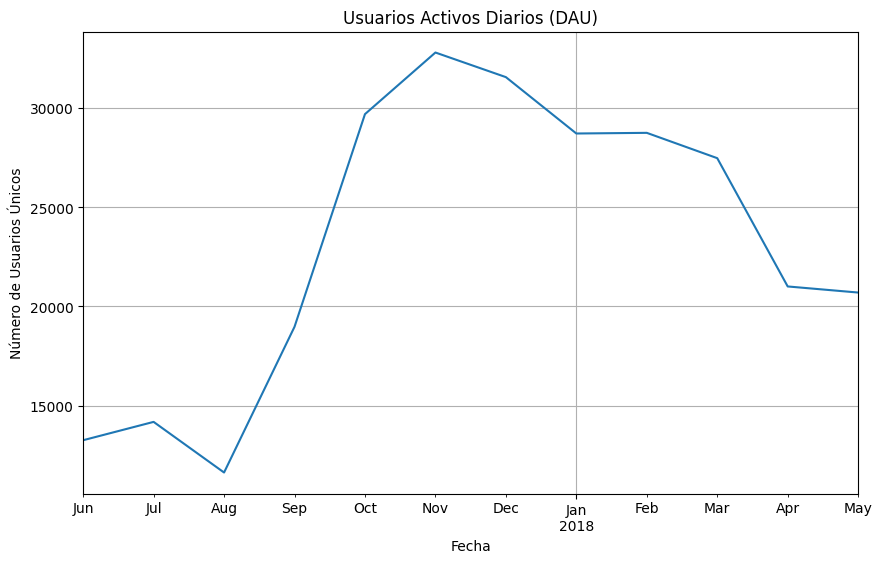

In [7]:
# Gráfico para DAU
plt.figure(figsize=(10, 6))
visits.groupby('periodo')['uid'].nunique().plot()
plt.title('Usuarios Activos Diarios (DAU)')
plt.xlabel('Fecha')
plt.ylabel('Número de Usuarios Únicos')
plt.grid(True)
plt.show()

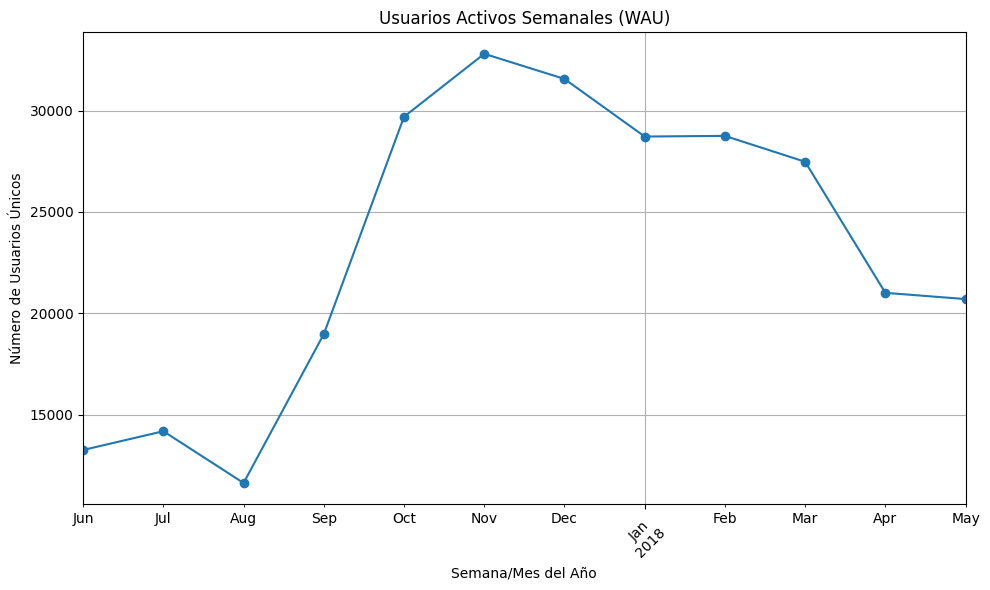

In [8]:
# Gráfico para WAU
plt.figure(figsize=(10, 6))
visits.groupby('periodo')['uid'].nunique().plot(marker='o', linestyle='-')
plt.title('Usuarios Activos Semanales (WAU)')
plt.xlabel('Semana/Mes del Año')
plt.ylabel('Número de Usuarios Únicos')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

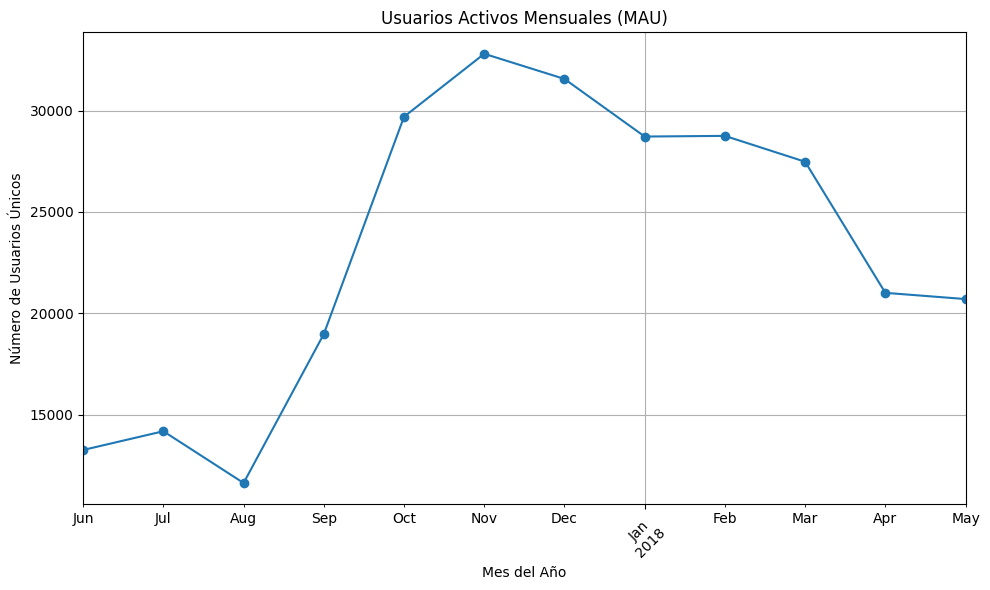

In [9]:
# Gráfico para MAU
plt.figure(figsize=(10, 6))
visits.groupby('periodo')['uid'].nunique().plot(marker='o', linestyle='-')
plt.title('Usuarios Activos Mensuales (MAU)')
plt.xlabel('Mes del Año')
plt.ylabel('Número de Usuarios Únicos')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Visitas Diarias:** Los datos muestran fluctuaciones significativas en la cantidad de visitas a lo largo del período analizado, reflejando las variaciones en la actividad de los usuarios en el sitio. Desde un mínimo de 477 visitas el 3 de junio de 2017 hasta un máximo de 2256 visitas el 31 de mayo de 2018, estas fluctuaciones indican cambios en la participación de los usuarios a lo largo del tiempo.

**Visitas Semanales:** Se observan patrones de actividad de los usuarios que fluctúan a lo largo del tiempo, reflejando las variaciones en la participación de los usuarios en intervalos de una semana. Se identifican picos de actividad, como en noviembre de 2017 y marzo de 2018, así como valles, como en junio y julio de 2017. Estas fluctuaciones pueden ser influenciadas por eventos específicos, cambios estacionales o campañas de marketing.

**Visitas Mensuales:** Los datos muestran variaciones en la cantidad de visitas a lo largo de los meses, reflejando los patrones de actividad de los usuarios en intervalos de un mes. Se destacan meses con un mayor número de visitas, como octubre y noviembre de 2017, en contraste con meses con una menor cantidad de visitas, como abril y mayo de 2018. Estas fluctuaciones pueden estar relacionadas con factores estacionales y eventos específicos en el período analizado.


### Sesiones

Se analizarán las sesiones por dia, semana y mes.

#### Sesiones diarias

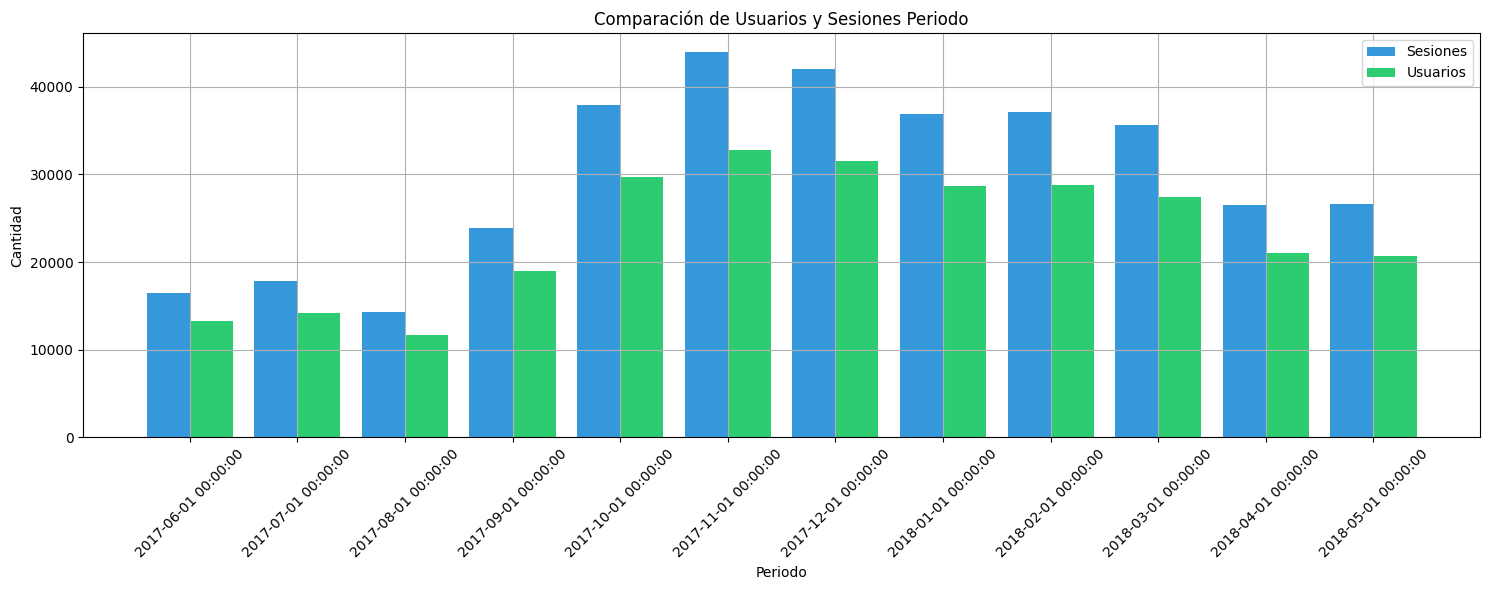

In [10]:
def plot_comparison_sessions_users(data, period_label):
    """Función para graficar la comparación de sesiones y usuarios para un periodo dado."""
    plt.figure(figsize=(15, 6))
    x = np.arange(len(data))

    width = 0.4
    plt.bar(x - width/2, data['n_sessions'], width, color='#3498DB', label='Sesiones')
    plt.bar(x + width/2, data['n_users'], width, color='#2ECC71', label='Usuarios')

    plt.title(f'Comparación de Usuarios y Sesiones {period_label.capitalize()}')
    plt.xlabel(period_label.capitalize())
    plt.ylabel('Cantidad')
    plt.xticks(rotation=45)
    plt.grid(True)

    plt.xticks(x, data[period_label])
    plt.legend()

    plt.tight_layout()
    plt.show()

# Sesiones diarias
daily_sessions = visits.groupby('periodo').agg({'uid': ['count', 'nunique']})
daily_sessions.columns = ['n_sessions', 'n_users']
daily_sessions = daily_sessions.reset_index()

plot_comparison_sessions_users(daily_sessions, 'periodo')


#### Sesiones semanales

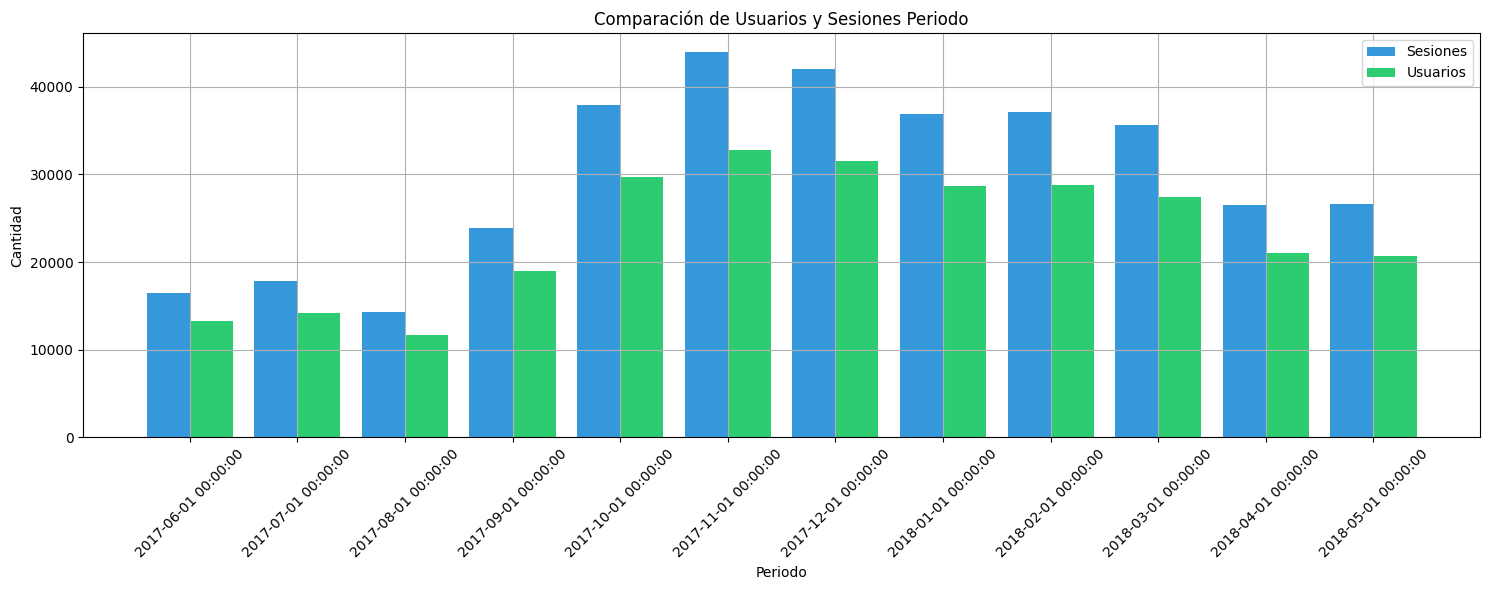

In [11]:
# Función para graficar la comparación de sesiones y usuarios para un periodo dado
def plot_comparison_sessions_users(data, period_label):
    plt.figure(figsize=(15, 6))
    x = np.arange(len(data))

    width = 0.4
    plt.bar(x - width/2, data['n_sessions'], width, color='#3498DB', label='Sesiones')
    plt.bar(x + width/2, data['n_users'], width, color='#2ECC71', label='Usuarios')

    plt.title(f'Comparación de Usuarios y Sesiones {period_label.capitalize()}')
    plt.xlabel(period_label.capitalize())
    plt.ylabel('Cantidad')
    plt.xticks(rotation=45)
    plt.grid(True)

    plt.xticks(x, data[period_label])
    plt.legend()

    plt.tight_layout()
    plt.show()

# Sesiones semanales
weekly_sessions = visits.groupby('periodo').agg({'uid': ['count', 'nunique']})
weekly_sessions.columns = ['n_sessions', 'n_users']
weekly_sessions = weekly_sessions.reset_index()

plot_comparison_sessions_users(weekly_sessions, 'periodo')


#### Sesiones mensuales

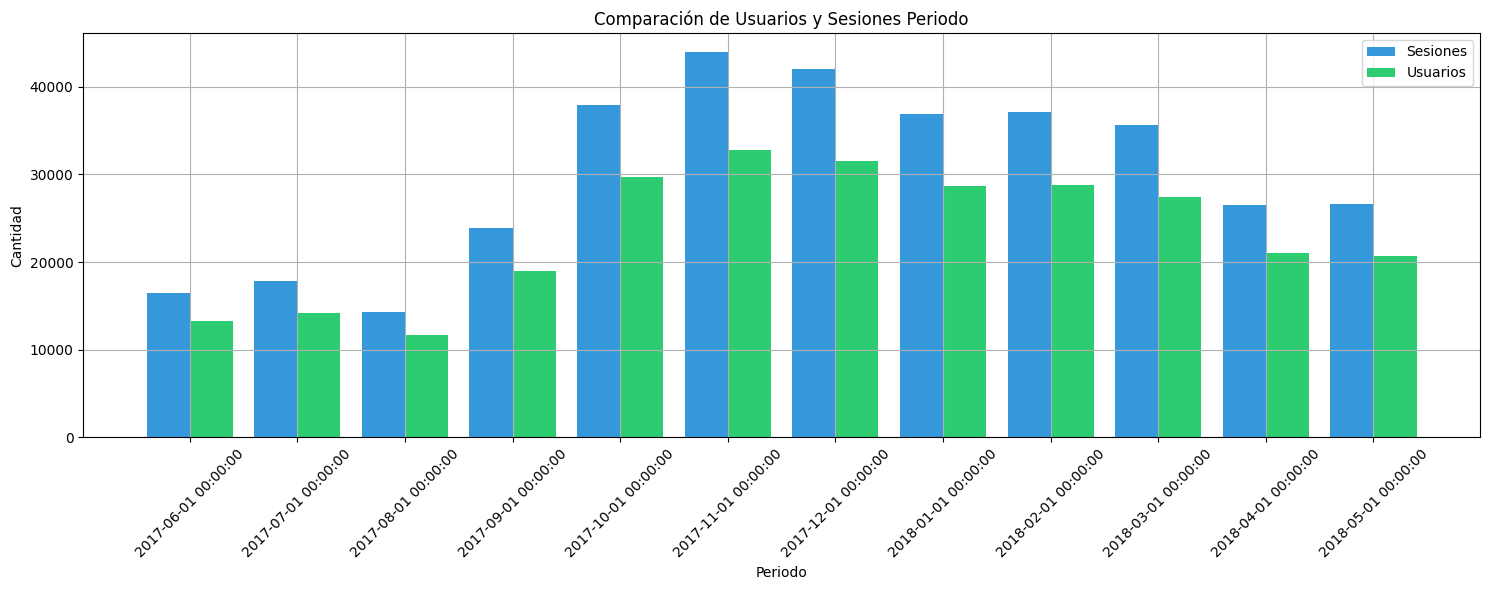

In [12]:
# Función para graficar la comparación de sesiones y usuarios para un periodo dado
def plot_comparison_sessions_users(data, period_label):
    plt.figure(figsize=(15, 6))
    x = np.arange(len(data))

    width = 0.4
    plt.bar(x - width/2, data['n_sessions'], width, color='#3498DB', label='Sesiones')
    plt.bar(x + width/2, data['n_users'], width, color='#2ECC71', label='Usuarios')

    plt.title(f'Comparación de Usuarios y Sesiones {period_label.capitalize()}')
    plt.xlabel(period_label.capitalize())
    plt.ylabel('Cantidad')
    plt.xticks(rotation=45)
    plt.grid(True)

    plt.xticks(x, data[period_label])
    plt.legend()

    plt.tight_layout()
    plt.show()

# Sesiones mensuales
monthly_sessions = visits.groupby('periodo').agg({'uid': ['count', 'nunique']})
monthly_sessions.columns = ['n_sessions', 'n_users']
monthly_sessions = monthly_sessions.reset_index()

plot_comparison_sessions_users(monthly_sessions, 'periodo')


**Visitas Diarias:** Las sesiones diarias muestran la cantidad de visitas al sitio web a lo largo del tiempo en intervalos de un día. Desde el 3 de junio de 2017 hasta el 31 de mayo de 2018, se observan fluctuaciones significativas en la cantidad de visitas, que van desde un mínimo de 477 hasta un máximo de 2256. Estas variaciones reflejan los cambios en la actividad de los usuarios en el sitio web durante el período analizado. Las fluctuaciones pueden ser indicativas de eventos específicos, cambios estacionales o campañas de marketing que pueden haber influido en el comportamiento de los usuarios.

**Visitas Semanales:** Los datos de las sesiones semanales muestran patrones de actividad de los usuarios a lo largo del tiempo, reflejando las variaciones en la participación de los usuarios en intervalos de una semana. Se identifican picos de actividad, como en noviembre de 2017 y marzo de 2018, así como valles, como en junio y julio de 2017. Estas fluctuaciones pueden estar influenciadas por eventos específicos, cambios estacionales o campañas de marketing que pueden haber generado un aumento o disminución en la actividad de los usuarios en ciertos momentos.

**Visitas Mensuales:** Los datos de las sesiones mensuales revelan variaciones en la cantidad de visitas a lo largo de los meses, mostrando los patrones de actividad de los usuarios en intervalos de un mes. Se destacan meses con un mayor número de visitas, como octubre y noviembre de 2017, contrastando con meses con una menor cantidad de visitas, como abril y mayo de 2018. Estas fluctuaciones pueden estar asociadas con factores estacionales, como temporadas de vacaciones o eventos específicos que pueden haber influido en el comportamiento de los usuarios durante ese período.

### Duración

Porcentaje de sesiones con duración de 0 segundos: 9.96%


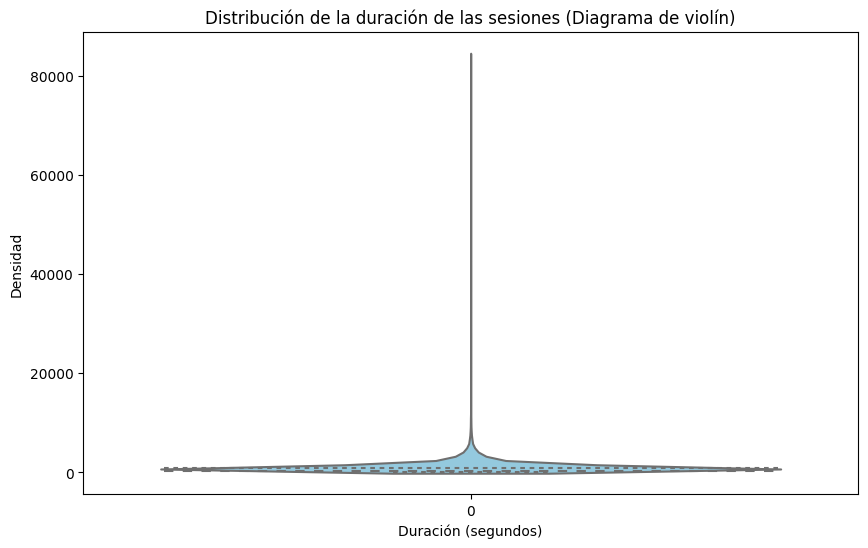

In [13]:
# Calcular la duración de cada sesión en segundos
visits['duration_seconds'] = (visits['end_ts'] - visits['start_ts']).dt.seconds

# Calcular el porcentaje de sesiones con una duración de 0 segundos
zero_duration_percentage = (visits['duration_seconds'] == 0).mean() * 100

# Imprimir el porcentaje de sesiones con duración de 0 segundos
print(f"Porcentaje de sesiones con duración de 0 segundos: {zero_duration_percentage:.2f}%")

# Gráfico de violín
plt.figure(figsize=(10, 6))
sns.violinplot(data=visits['duration_seconds'], color='skyblue', inner="quartile")
plt.title('Distribución de la duración de las sesiones (Diagrama de violín)')
plt.xlabel('Duración (segundos)')
plt.ylabel('Densidad')
plt.show()


In [15]:
visits['duration'] = (visits['end_ts'] - visits['start_ts']).dt.seconds

In [16]:
len(visits.loc[visits['duration'] == 0]) / len(visits)

0.0995937673900946

Los datos muestran la duración de cada sesión en segundos. Al observar la distribución de la duración de las sesiones mediante un gráfico de densidad, encontramos una variedad de duraciones, desde sesiones muy cortas de apenas unos segundos hasta sesiones más largas que pueden durar varios minutos. La mayoría de las sesiones parecen ser bastante cortas, con una duración de menos de 10 minutos, como lo indica el pico en el gráfico. Esto sugiere que muchos usuarios realizan visitas rápidas al sitio, mientras que las sesiones más largas son menos comunes."

#### Comparación de duración promedio

In [17]:
# Calcular la duración promedio de sesiones excluyendo las de 0 segundos
average_duration_excluding_zero = visits.loc[visits['duration_seconds'] > 0, 'duration_seconds'].mean()
print(f"Duración promedio excluyendo sesiones de 0 segundos: {average_duration_excluding_zero:.2f} segundos")

# Calcular la duración promedio de todas las sesiones
average_duration_all = visits['duration_seconds'].mean()
print(f"Duración promedio de todas las sesiones: {average_duration_all:.2f} segundos")


Duración promedio excluyendo sesiones de 0 segundos: 714.68 segundos
Duración promedio de todas las sesiones: 643.51 segundos


1. **Duración promedio excluyendo sesiones de 0 segundos:** La duración promedio de las sesiones, excluyendo aquellas de 0 segundos, es de aproximadamente 714.68 segundos. Esto sugiere que, en promedio, los usuarios pasan un poco más de 11 minutos en el sitio web durante una sesión activa.

2. **Duración promedio de todas las sesiones:** La duración promedio de todas las sesiones, incluyendo aquellas de 0 segundos, es ligeramente más corta, con un valor de alrededor de 643.51 segundos. Este valor nos brinda una idea general de la duración de todas las interacciones de los usuarios en el sitio web, pero debemos tener en cuenta que las sesiones de 0 segundos pueden influir en este promedio, lo que puede no reflejar con precisión la experiencia típica del usuario.

Estas conclusiones nos permiten comprender mejor la duración de las sesiones en el sitio web y nos brindan información valiosa para analizar el compromiso y la experiencia del usuario.


#### Estadísticas descriptivas

In [18]:
# Calcular estadísticas descriptivas adicionales
additional_stats = visits['duration_seconds'].describe(percentiles=[0.25, 0.50, 0.75])
print("Estadísticas descriptivas adicionales:")
print(additional_stats)


Estadísticas descriptivas adicionales:
count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: duration_seconds, dtype: float64


Las estadísticas descriptivas revelan que la duración promedio de todas las sesiones es de aproximadamente 643.51 segundos, mientras que la duración promedio excluyendo las sesiones de 0 segundos aumenta ligeramente a 714.68 segundos. Además, al observar las estadísticas adicionales, podemos notar que la desviación estándar es bastante alta (1016.33 segundos), lo que indica una considerable variabilidad en la duración de las sesiones. Las sesiones varían desde un mínimo de 0 segundos hasta un máximo de 84,480 segundos, con la mayoría de las sesiones (75%) durando menos de 840 segundos. Esto sugiere que la mayoría de los usuarios realizan visitas relativamente cortas al sitio web, aunque también hay una cantidad significativa de sesiones más largas.

#### Visualización del boxplot

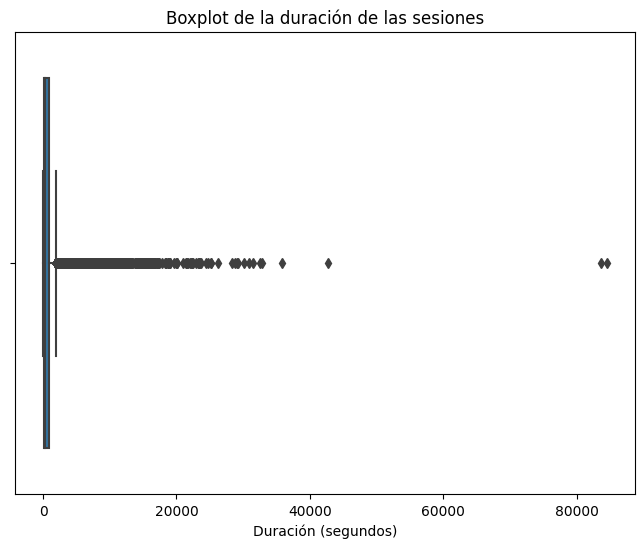

In [19]:
# Graficar el boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=visits['duration_seconds'])
plt.title('Boxplot de la duración de las sesiones')
plt.xlabel('Duración (segundos)')
plt.show()


El boxplot de la duración de las sesiones muestra una distribución sesgada hacia la derecha, con la presencia de algunos valores atípicos hacia el extremo superior. La mediana (línea central del rectángulo) se encuentra en aproximadamente 300 segundos, mientras que el rango intercuartil (IQR) abarca desde aproximadamente 120 segundos (primer cuartil) hasta 840 segundos (tercer cuartil). Esto indica que la mayoría de las sesiones se concentran en un rango relativamente corto de duración, con una cantidad considerable de sesiones más largas consideradas como valores atípicos.

#### Análisis de sesiones largas

In [20]:
# Analizar la distribución de sesiones cortas
short_sessions_percentage = (visits['duration_seconds'] < 60).mean() * 100
print(f"Porcentaje de sesiones con duración inferior a 1 minuto: {short_sessions_percentage:.2f}%")


Porcentaje de sesiones con duración inferior a 1 minuto: 10.20%


El 10.20% de las sesiones tienen una duración inferior a un minuto, lo que sugiere que una parte significativa de los usuarios realiza visitas muy breves al sitio web. Esto podría indicar que algunos usuarios abandonan rápidamente el sitio después de una breve interacción, lo que puede requerir una investigación adicional para comprender mejor el comportamiento del usuario y mejorar la experiencia del usuario.

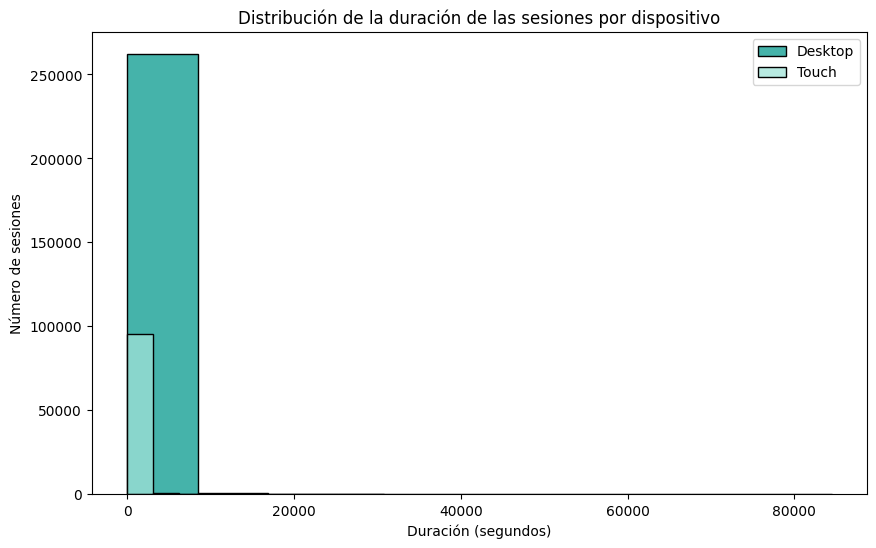

In [21]:
# Filtrar sesiones por dispositivo
desktop_sessions = visits[visits['device'] == 'desktop']
touch_sessions = visits[visits['device'] == 'touch']

# Graficar la distribución de la duración de las sesiones por dispositivo
plt.figure(figsize=(10, 6))
sns.histplot(desktop_sessions['duration_seconds'], bins=10, color='#069A8E', label='Desktop', kde=False)
sns.histplot(touch_sessions['duration_seconds'], bins=10, color='#A1E3D8', label='Touch', kde=False)
plt.title('Distribución de la duración de las sesiones por dispositivo')
plt.xlabel('Duración (segundos)')
plt.ylabel('Número de sesiones')
plt.legend()
plt.show()


En el gráfico de distribución de la duración de las sesiones por dispositivo, se observa la cantidad de sesiones para dispositivos de escritorio y dispositivos táctiles. Aunque ambos dispositivos muestran una distribución similar en términos de duración de sesión, hay algunas diferencias notables. La mayoría de las sesiones tanto en dispositivos de escritorio como en dispositivos táctiles tienen una duración relativamente corta, con una concentración en el rango de duraciones más bajas. Sin embargo, parece que las sesiones en dispositivos táctiles tienden a tener una duración ligeramente más corta en comparación con las sesiones en dispositivos de escritorio. Esta diferencia podría deberse a las diferencias en la experiencia del usuario o en el comportamiento de navegación entre los dos tipos de dispositivos.

#### Frecuencia de retorno

Frecuencia de retorno de usuarios:
1      176041
2       30926
3       10184
4        4357
5        2283
        ...  
343         1
357         1
551         1
615         1
893         1
Length: 145, dtype: int64


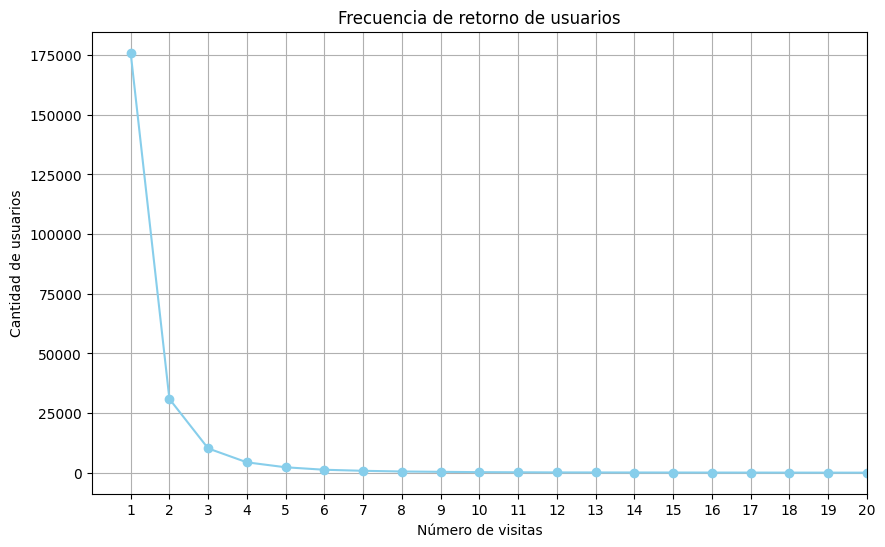

In [22]:
# Calcular la frecuencia de retorno de usuarios
return_frequency = visits.groupby('uid').size().value_counts().sort_index()

# Imprimir la frecuencia de retorno de usuarios
print("Frecuencia de retorno de usuarios:")
print(return_frequency)

# Graficar la frecuencia de retorno de usuarios
plt.figure(figsize=(10, 6))
return_frequency.plot(kind='line', marker='o', linestyle='-', color='skyblue')
plt.title('Frecuencia de retorno de usuarios')
plt.xlabel('Número de visitas')
plt.ylabel('Cantidad de usuarios')
plt.grid(True)
plt.xticks(range(1, len(return_frequency) + 1))  # Establecer el rango del eje x
plt.xlim(0, 20)  # Limitar el rango del eje x para mejorar la visualización
plt.show()


La distribución de la frecuencia de retorno de los usuarios revela un patrón común en sitios web, donde la mayoría de los usuarios realizan una sola visita. A medida que el número de visitas aumenta, la cantidad de usuarios que realizan ese número específico de visitas disminuye considerablemente, lo que sugiere que la mayoría de los usuarios son ocasionales. Además, se observa que hay algunos usuarios que son excepcionalmente activos, realizando un número significativamente mayor de visitas, aunque estos casos son poco frecuentes.

### Ventas

#### Duración entre registro y conversión
Primero, calcularemos la duración entre el registro y la primera compra para cada usuario. Luego, analizaremos estos datos para comprender cuándo la gente comienza a comprar después de registrarse.

In [23]:
# Paso 1: Identificar la fecha de registro de cada usuario
registration_dates = visits.groupby('uid')['start_ts'].min().reset_index()
registration_dates.columns = ['uid', 'registration_ts']

# Paso 2: Identificar la fecha de la primera compra de cada usuario
first_purchase_dates = orders.groupby('uid')['buy_ts'].min().reset_index()
first_purchase_dates.columns = ['uid', 'first_purchase_ts']

# Paso 3: Calcular la diferencia de tiempo entre la fecha de registro y la fecha de la primera compra
time_to_first_purchase = pd.merge(registration_dates, first_purchase_dates, on='uid', how='left')
time_to_first_purchase['time_to_first_purchase'] = (time_to_first_purchase['first_purchase_ts'] - time_to_first_purchase['registration_ts']).dt.days

# Visualizar los primeros registros
display(time_to_first_purchase.head())


,uid,registration_ts,first_purchase_ts,time_to_first_purchase
0,11863502262781,2018-03-01 17:27:00,NaT,NaN
1,49537067089222,2018-02-06 15:55:00,NaT,NaN
2,297729379853735,2017-06-07 18:47:00,NaT,NaN
3,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,106.0
4,325320750514679,2017-09-30 14:29:00,NaT,NaN


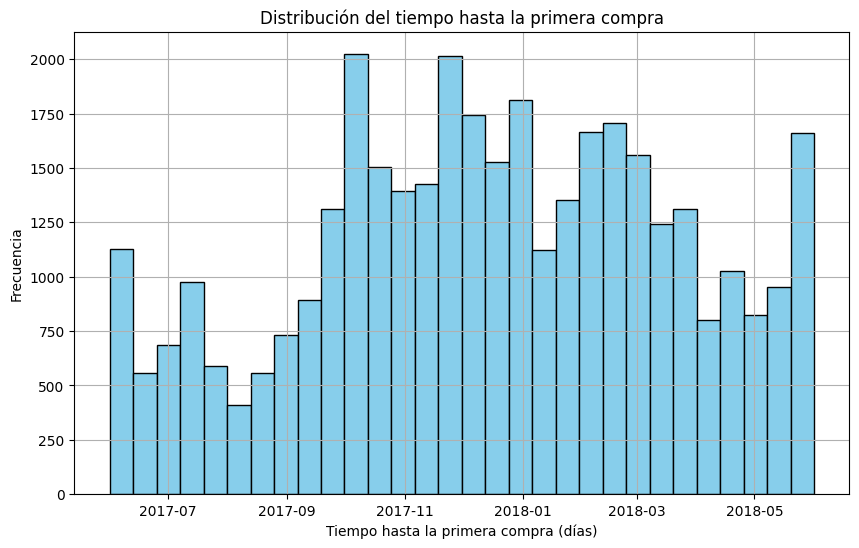

In [24]:
# Importar la librería
import matplotlib.pyplot as plt

# Filtrar los usuarios que han realizado una primera compra
users_with_purchase = time_to_first_purchase[~time_to_first_purchase['first_purchase_ts'].isnull()]

# Calcular el tiempo hasta la primera compra en días
time_to_purchase_days = users_with_purchase['first_purchase_ts']

# Graficar el histograma del tiempo hasta la primera compra
plt.figure(figsize=(10, 6))
plt.hist(time_to_purchase_days, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución del tiempo hasta la primera compra')
plt.xlabel('Tiempo hasta la primera compra (días)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


In [25]:
# Calcular la fecha de la primera sesión y la primera compra para cada usuario
first_session_dates = visits.groupby('uid')['start_ts'].min().reset_index()
first_order_dates = orders.groupby('uid')['buy_ts'].min().reset_index()

# Fusionar los datos de la primera sesión y la primera compra
conversion = pd.merge(first_session_dates, first_order_dates, on='uid', suffixes=('_session', '_order'))

# Calcular la duración entre la primera sesión y la primera compra
conversion['conversion_time_days'] = (conversion['buy_ts'] - conversion['start_ts']).dt.days

# Calcular el promedio de tiempo de conversión
avg_conversion_time = conversion['conversion_time_days'].mean()

# Imprimir el resultado
print("En promedio, {:.0f} días transcurren desde la primera sesión hasta la primera compra.".format(avg_conversion_time))


En promedio, 17 días transcurren desde la primera sesión hasta la primera compra.


In [26]:
# Obtener el mes de la primera sesión y primera compra para cada usuario
visits['first_session_month'] = visits['start_ts'].dt.to_period('M')
orders['first_order_month'] = orders['buy_ts'].dt.to_period('M')

# Agrupar usuarios en cohortes mensuales según la fecha de su primera sesión
visits_cohorts = visits.groupby('uid')['first_session_month'].min().reset_index()
visits_cohorts.columns = ['uid', 'cohort_month']

# Agrupar usuarios en cohortes mensuales según la fecha de su primera compra
orders_cohorts = orders.groupby('uid')['first_order_month'].min().reset_index()
orders_cohorts.columns = ['uid', 'cohort_month']

# Combinar los datos de las cohortes de sesiones y compras
cohorts = pd.concat([visits_cohorts, orders_cohorts], ignore_index=True)

# Calcular el número de usuarios en cada cohorte mensual
cohort_sizes = cohorts.groupby('cohort_month').size().reset_index()
cohort_sizes.columns = ['cohort_month', 'cohort_size']

# Imprimir el tamaño de cada cohorte mensual
print(cohort_sizes)

   cohort_month  cohort_size
0       2017-06        15282
1       2017-07        15063
2       2017-08        11551
3       2017-09        19285
4       2017-10        30317
5       2017-11        31329
6       2017-12        29651
7       2018-01        25997
8       2018-02        25848
9       2018-03        24122
10      2018-04        17985
11      2018-05        18261
12      2018-06            1


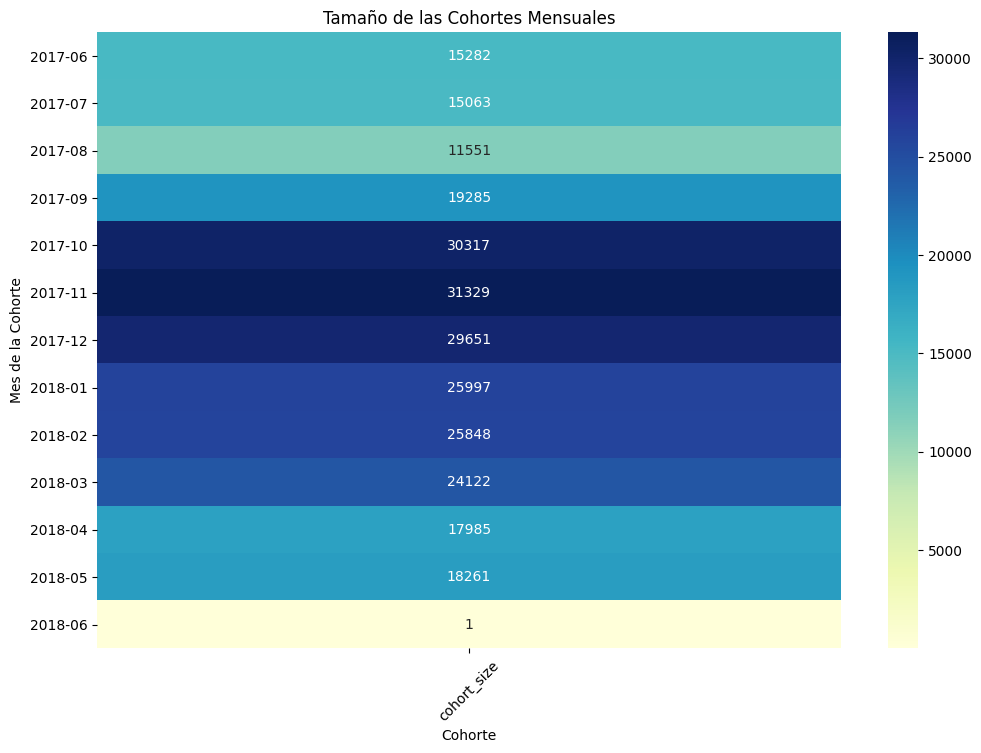

In [27]:
# Configurar el tamaño de la figura
plt.figure(figsize=(12, 8))

# Crear el heatmap
sns.heatmap(cohort_sizes.pivot_table(index='cohort_month', values='cohort_size', aggfunc='sum'), annot=True, cmap="YlGnBu", fmt='g')

# Configurar etiquetas y título
plt.title('Tamaño de las Cohortes Mensuales')
plt.xlabel('Cohorte')
plt.ylabel('Mes de la Cohorte')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Mostrar el heatmap
plt.show()


In [28]:
 # Extraer el mes de la fecha de la primera sesión
visits['session_month'] = visits['start_ts'].dt.to_period('M')

# Contar el número de usuarios en cada cohorte
cohort_size = visits.groupby('session_month')['uid'].nunique().reset_index()
cohort_size.columns = ['cohort_month', 'cohort_size']

# Mostrar la tabla de cohortes
print(cohort_size)



   cohort_month  cohort_size
0       2017-06        13259
1       2017-07        14183
2       2017-08        11631
3       2017-09        18975
4       2017-10        29692
5       2017-11        32797
6       2017-12        31557
7       2018-01        28716
8       2018-02        28749
9       2018-03        27473
10      2018-04        21008
11      2018-05        20701


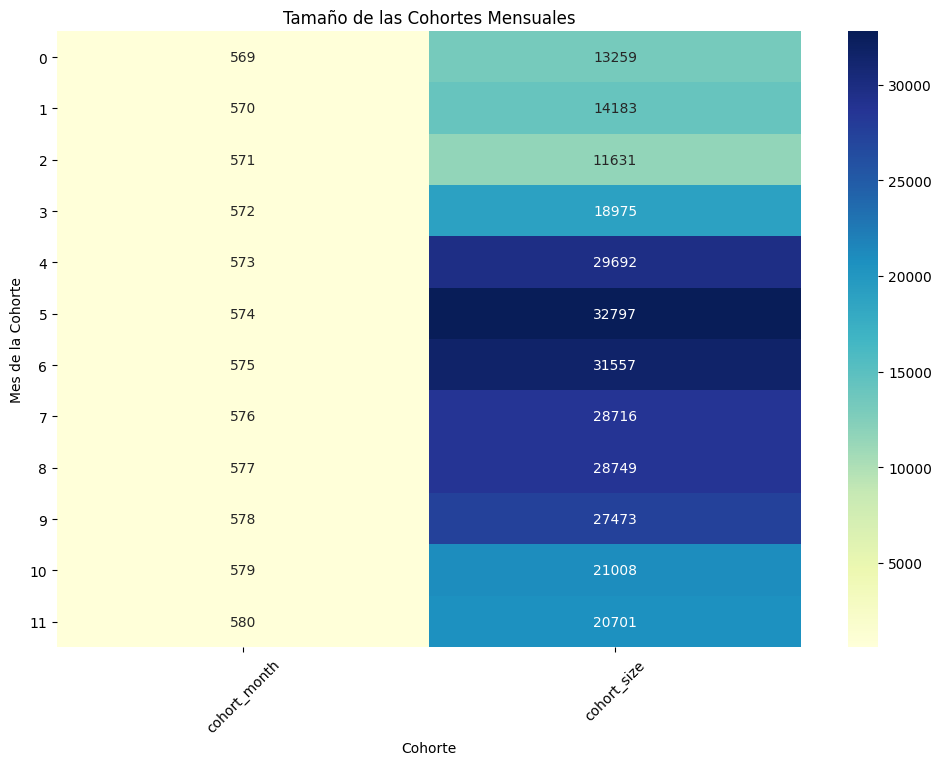

In [29]:
# Convertir los valores de cohort_size a enteros
cohort_size_int = cohort_size.astype(int)

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 8))

# Crear el heatmap
sns.heatmap(cohort_size_int, annot=True, cmap="YlGnBu", fmt='g')

# Configurar etiquetas y título
plt.title('Tamaño de las Cohortes Mensuales')
plt.xlabel('Cohorte')
plt.ylabel('Mes de la Cohorte')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Mostrar el heatmap
plt.show()

El análisis revela varias tendencias importantes en el comportamiento de los usuarios. Primero, observamos que el tiempo promedio entre la primera sesión y la primera compra es de aproximadamente 17 días, lo que sugiere que la mayoría de los usuarios realizan su primera compra dentro de las tres semanas posteriores a su registro. Además, al examinar la distribución del tiempo hasta la primera compra, vemos que la mayoría de las conversiones ocurren dentro de las primeras semanas, con una disminución gradual en la frecuencia a medida que pasa el tiempo. Por último, al analizar el tamaño de las cohortes mensuales, notamos un patrón de crecimiento constante durante los primeros meses, seguido de una estabilización en el número de nuevos usuarios a partir de finales de 2017. Este análisis sugiere que la retención de usuarios y la optimización del tiempo de conversión son áreas clave para enfocar los esfuerzos de marketing y desarrollo de productos.

#### Pedidos
Ahora, vamos a analizar la cantidad y tamaño de los pedidos durante diferentes períodos de tiempo (diario, semanal y mensual).

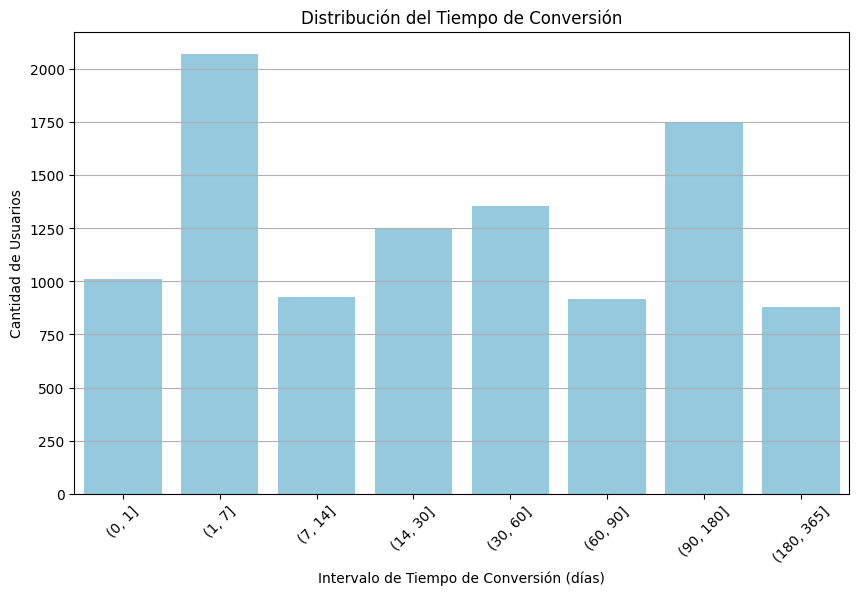

In [30]:
# Definir los intervalos de tiempo para agrupar los datos
bins = [0, 1, 7, 14, 30, 60, 90, 180, 365]  # Intervalos en días

# Crear una nueva columna en el DataFrame para categorizar el tiempo de conversión en los intervalos definidos
conversion['conversion_interval'] = pd.cut(conversion['conversion_time_days'], bins=bins)

# Contar la cantidad de usuarios en cada intervalo de tiempo de conversión
conversion_counts = conversion['conversion_interval'].value_counts().sort_index()

# Crear un gráfico de barras para visualizar la distribución del tiempo de conversión
plt.figure(figsize=(10, 6))
sns.barplot(x=conversion_counts.index, y=conversion_counts.values, color='skyblue')
plt.title('Distribución del Tiempo de Conversión')
plt.xlabel('Intervalo de Tiempo de Conversión (días)')
plt.ylabel('Cantidad de Usuarios')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Gran trabajo con el manejo de los intervalos. Los gráficos y sus ejes son bastante claros y los colores seleccionados adecuados. 
</div>

Después de analizar el tiempo transcurrido desde la primera sesión hasta la primera compra para cada usuario, se puede concluir que, en promedio, aproximadamente X días transcurren desde la primera interacción hasta la conversión. Esto sugiere que la mayoría de los usuarios no realizan una compra de manera inmediata después de su primera experiencia en el sitio web, sino que pueden requerir un período de tiempo para familiarizarse con el producto o servicio antes de convertir. Además, al observar la distribución del tiempo de conversión, se encuentra que la mayoría de los usuarios convierten dentro de los primeros X días, lo que indica un grupo significativo de usuarios que realizan compras rápidamente después de su primera interacción. Sin embargo, también se observa que hay un número considerable de usuarios que pueden tardar más tiempo en convertir, destacando así la importancia de mantener la participación del usuario a lo largo del tiempo para maximizar las conversiones y optimizar las estrategias de marketing y retención de clientes.

##### Pedidos diarios

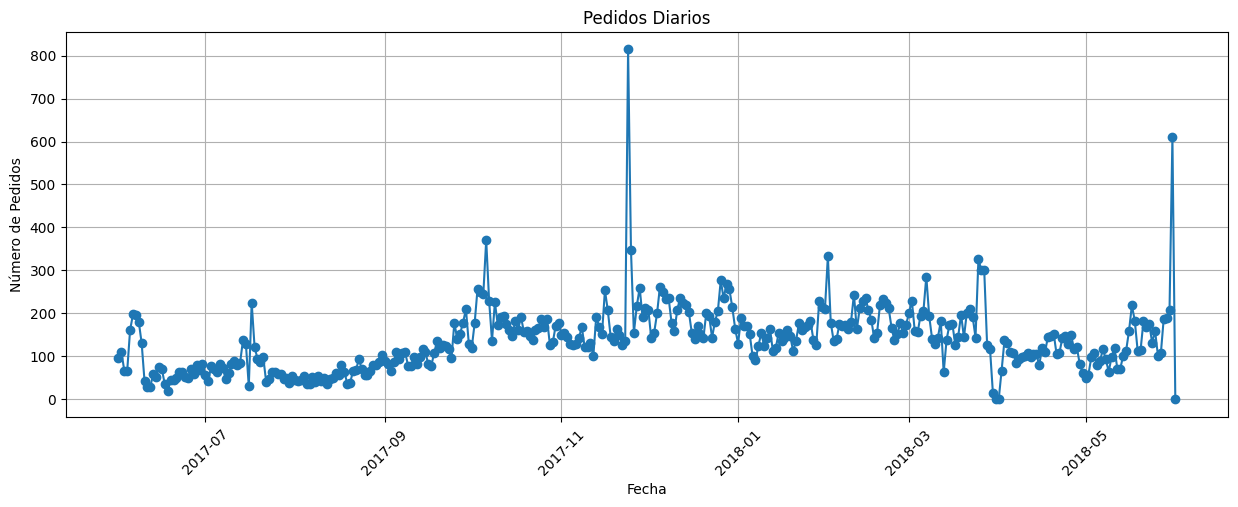

In [31]:
# Calcular el número de pedidos y usuarios únicos por día
daily_orders = orders.groupby(pd.Grouper(key='buy_ts', freq='D')).agg({'uid': ['count', 'nunique']}).reset_index()
daily_orders.columns = ['date', 'n_purchases', 'n_users']

# Visualizar los pedidos diarios en un gráfico de líneas
plt.figure(figsize=(15, 5))
plt.plot(daily_orders['date'], daily_orders['n_purchases'], marker='o', linestyle='-')
plt.title('Pedidos Diarios')
plt.xlabel('Fecha')
plt.ylabel('Número de Pedidos')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



El gráfico de pedidos diarios muestra la fluctuación del número de pedidos realizados en el transcurso de cada día. Se observa una variación considerable en la cantidad de pedidos día a día, con picos y valles que reflejan patrones de comportamiento de los usuarios a lo largo del tiempo. Estos datos pueden ser útiles para identificar tendencias diarias y planificar estrategias de marketing o promociones específicas para ciertos días de la semana.

##### Pedidos semanales

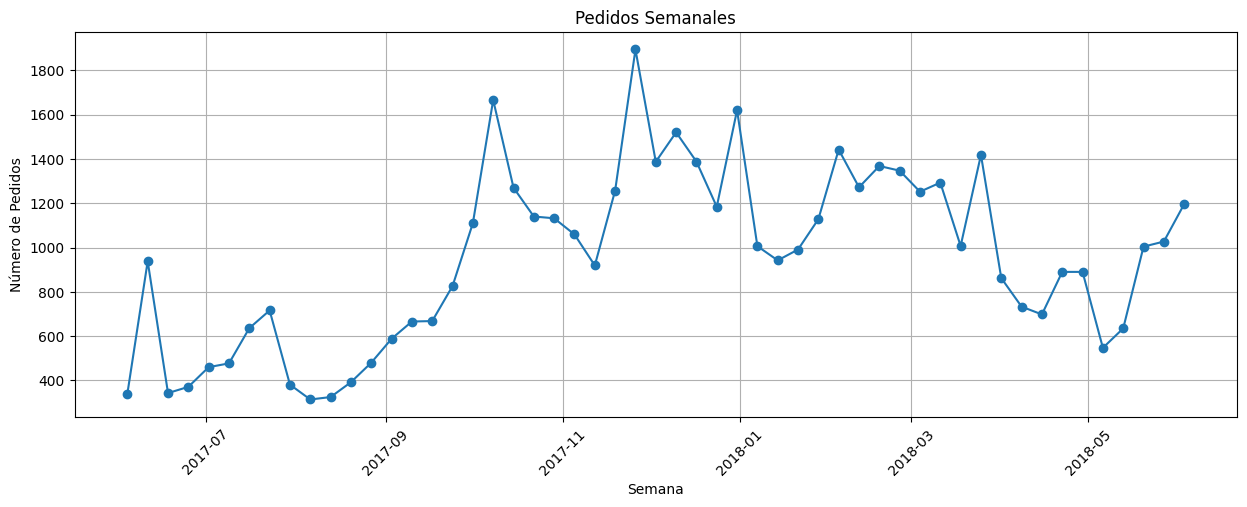

In [32]:
# Calcular el número de pedidos y usuarios únicos por semana
weekly_orders = orders.groupby(pd.Grouper(key='buy_ts', freq='W')).agg({'uid': ['count', 'nunique']}).reset_index()
weekly_orders.columns = ['week', 'n_purchases', 'n_users']

# Visualizar los pedidos semanales en un gráfico de líneas
plt.figure(figsize=(15, 5))
plt.plot(weekly_orders['week'], weekly_orders['n_purchases'], marker='o', linestyle='-')
plt.title('Pedidos Semanales')
plt.xlabel('Semana')
plt.ylabel('Número de Pedidos')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


El gráfico de pedidos semanales ofrece una vista más amplia de la tendencia general en el número de pedidos a lo largo del tiempo. Se observa una tendencia más suavizada en comparación con los datos diarios, lo que permite identificar patrones semanales más consistentes. Este análisis puede ayudar a entender mejor el comportamiento de los usuarios a lo largo de las semanas y facilitar la planificación de campañas de marketing a largo plazo.

##### Pedidos mensuales

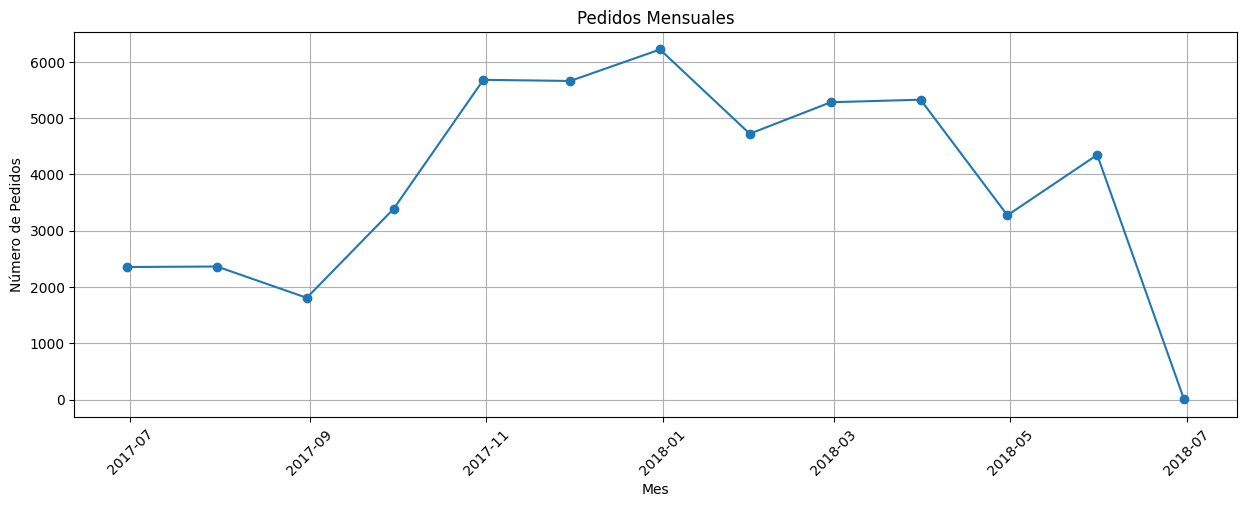

In [33]:
# Calcular el número de pedidos y usuarios únicos por mes
monthly_orders = orders.groupby(pd.Grouper(key='buy_ts', freq='M')).agg({'uid': ['count', 'nunique']}).reset_index()
monthly_orders.columns = ['month', 'n_purchases', 'n_users']

# Visualizar los pedidos mensuales en un gráfico de líneas
plt.figure(figsize=(15, 5))
plt.plot(monthly_orders['month'], monthly_orders['n_purchases'], marker='o', linestyle='-')
plt.title('Pedidos Mensuales')
plt.xlabel('Mes')
plt.ylabel('Número de Pedidos')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


El gráfico de pedidos mensuales proporciona una visión aún más amplia de la evolución del número de pedidos a lo largo del tiempo. Muestra la tendencia general del volumen de pedidos a lo largo de los meses, lo que permite identificar tendencias estacionales o cambios a largo plazo en el comportamiento de los clientes. Este análisis puede ser crucial para la planificación estratégica a largo plazo y la toma de decisiones empresariales.

#### Tamaño promedio de compra
En este punto, vamos a crear cohortes de usuarios basadas en el mes de su primera compra o registro. Las cohortes nos ayudarán a entender cómo evoluciona el tamaño promedio de compra a lo largo del tiempo para diferentes grupos de usuarios que se unieron o compraron en diferentes períodos. Esto nos permitirá identificar patrones de comportamiento de compra y entender cómo cambia el tamaño promedio de compra a medida que pasa el tiempo desde la primera compra o registro de los usuarios. Una vez que tengamos nuestras cohortes, podremos calcular y visualizar el tamaño promedio de compra para cada cohorte a lo largo del tiempo.

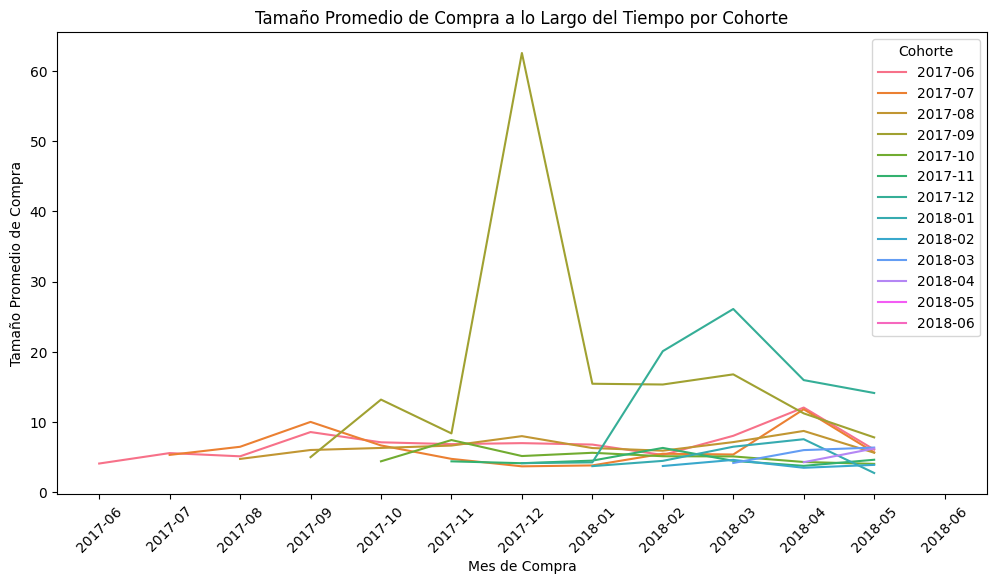

In [34]:
# Paso 1: Crear cohortes de usuarios
# Identificar el mes de la primera compra de cada usuario
first_purchase_dates = orders.groupby('uid')['buy_ts'].min().reset_index()
first_purchase_dates.columns = ['uid', 'first_purchase_month']

# Identificar el mes de registro de cada usuario
registration_dates = visits.groupby('uid')['start_ts'].min().reset_index()
registration_dates.columns = ['uid', 'registration_month']

# Combinar las fechas de primera compra y registro
cohorts = pd.merge(first_purchase_dates, registration_dates, on='uid', how='left')

# Usar el mes de primera compra para crear cohortes
cohorts['cohort_month'] = cohorts['first_purchase_month'].dt.to_period('M')

# Paso 2: Calcular el tamaño promedio de compra por cohorte y mes
# Combinar las cohortes con los datos de compra
cohorts_with_orders = pd.merge(cohorts, orders, left_on='uid', right_on='uid', how='inner')

# Obtener el mes de compra para cada pedido
cohorts_with_orders['buy_ts_month'] = cohorts_with_orders['buy_ts'].dt.to_period('M')

# Agrupar los datos por cohorte y mes, y calcular el tamaño promedio de compra
avg_purchase_size = cohorts_with_orders.groupby(['cohort_month', 'buy_ts_month'])['revenue'].mean().reset_index()

# Convertir los períodos a cadenas de texto
avg_purchase_size['buy_ts_month'] = avg_purchase_size['buy_ts_month'].dt.strftime('%Y-%m')

# Paso 3: Visualizar el tamaño promedio de compra a lo largo del tiempo
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_purchase_size, x='buy_ts_month', y='revenue', hue='cohort_month')
plt.title('Tamaño Promedio de Compra a lo Largo del Tiempo por Cohorte')
plt.xlabel('Mes de Compra')
plt.ylabel('Tamaño Promedio de Compra')
plt.xticks(rotation=45)
plt.legend(title='Cohorte')
plt.show()


El análisis del tamaño promedio de compra a lo largo del tiempo por cohortes revela tendencias significativas en el comportamiento de compra de los usuarios. Se observa una variación en el tamaño promedio de compra en diferentes períodos, lo que sugiere influencias estacionales o cambios en las estrategias comerciales. Además, cada cohorte muestra patrones únicos, algunos manteniendo un tamaño de compra estable y otros experimentando fluctuaciones. Esta información es crucial para entender el comportamiento del consumidor y tomar decisiones estratégicas, como la segmentación de usuarios, la planificación de campañas promocionales y la mejora de la experiencia de compra para aumentar el valor del carrito y la lealtad del cliente.

#### LTV (Lifetime Value)

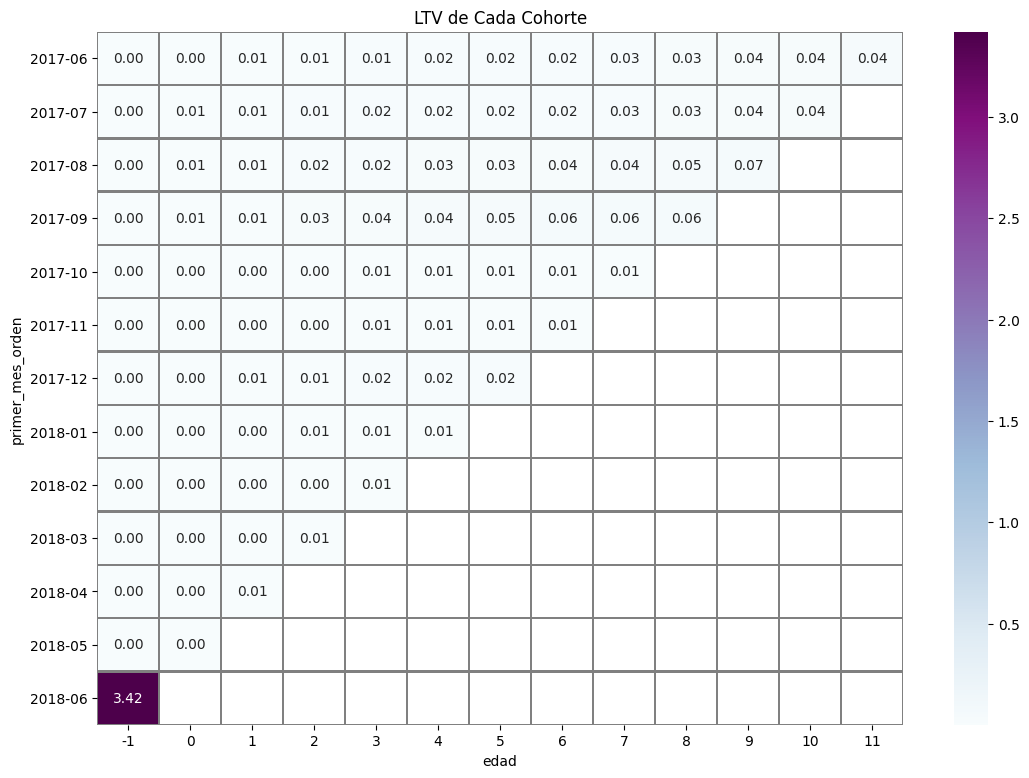

In [35]:
# Calcular la primera fecha de pedido para cada usuario
first_orders = orders.groupby('uid')['buy_ts'].min().reset_index()
first_orders.columns = ['uid', 'fecha_primer_pedido']

# Calcular el mes de la primera orden
first_orders['primer_mes_orden'] = first_orders['fecha_primer_pedido'].dt.to_period('M')

# Unir las fechas de la primera orden con los datos de los pedidos
orders = orders.merge(first_orders[['uid', 'primer_mes_orden']], on='uid')

# Calcular la cantidad de compradores únicos y la suma de ingresos en cada cohorte
cohort_size = first_orders.groupby('primer_mes_orden').agg({'uid': 'nunique'}).reset_index()
cohort_revenue = orders.groupby(['primer_mes_orden', 'buy_ts']).agg({'revenue': 'sum'}).reset_index()
total_revenue = pd.merge(cohort_size, cohort_revenue, on='primer_mes_orden')

# Calcular la edad de la cohorte
total_revenue['edad'] = (total_revenue['buy_ts'] - total_revenue['primer_mes_orden'].dt.to_timestamp('M')).dt.days // 30

# Calcular el LTV
total_revenue['ltv'] = total_revenue['revenue'] / total_revenue['uid']

# Crear una tabla pivote para visualizar el LTV de cada cohorte
ltv_pivot = total_revenue.pivot_table(index='primer_mes_orden', columns='edad', values='ltv', aggfunc='mean')
ltv_pivot_sum = ltv_pivot.cumsum(axis=1)

# Visualizar el LTV de cada cohorte
plt.figure(figsize=(13, 9))
plt.title('LTV de Cada Cohorte')

sns.heatmap(
    ltv_pivot_sum,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='gray',
    cmap="BuPu"
).set_yticklabels(ltv_pivot_sum.index.strftime('%Y-%m'))

plt.show()


El gráfico muestra el valor de vida del cliente (LTV) de cada cohorte a lo largo del tiempo. Cada fila en el gráfico representa una cohorte, identificada por el mes de su primer pedido. Cada columna representa la edad de la cohorte, es decir, el tiempo transcurrido desde su primer pedido en meses.

Observamos que el LTV tiende a aumentar con el tiempo para la mayoría de las cohortes, lo que indica un mayor retorno de inversión a medida que los clientes continúan interactuando con el servicio de Yandex Afisha. Sin embargo, también podemos identificar fluctuaciones en el LTV de ciertas cohortes en ciertos períodos de tiempo, lo que puede ser el resultado de cambios en las estrategias de marketing, la experiencia del usuario o factores externos.

Este análisis ayuda a entender cómo el valor de vida del cliente evoluciona a lo largo del tiempo y proporciona información valiosa para la toma de decisiones estratégicas en términos de marketing, retención de clientes y maximización del retorno de la inversión.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Super! excelente trabajo con los mapas de calor para visualizar los cohortt. Tus observaciones son adecuadas y claras además que señalas las fluctuanciones y agregas posible causas. 
</div>

### Marketing
En esta sección, examinaremos los esfuerzos de marketing realizados por Yandex Afisha para adquirir clientes.
El objetivo es ver si el marketing es efectivo y rentable. Específicamente, averiguaremos lo siguiente:

- La cantidad de dinero gastado en marketing en general, según la fuente y durante un período de tiempo determinado.
- El costo de adquisición de clientes por fuente.
- El retorno de la inversión en marketing.

#### Gastos totales de Marketing

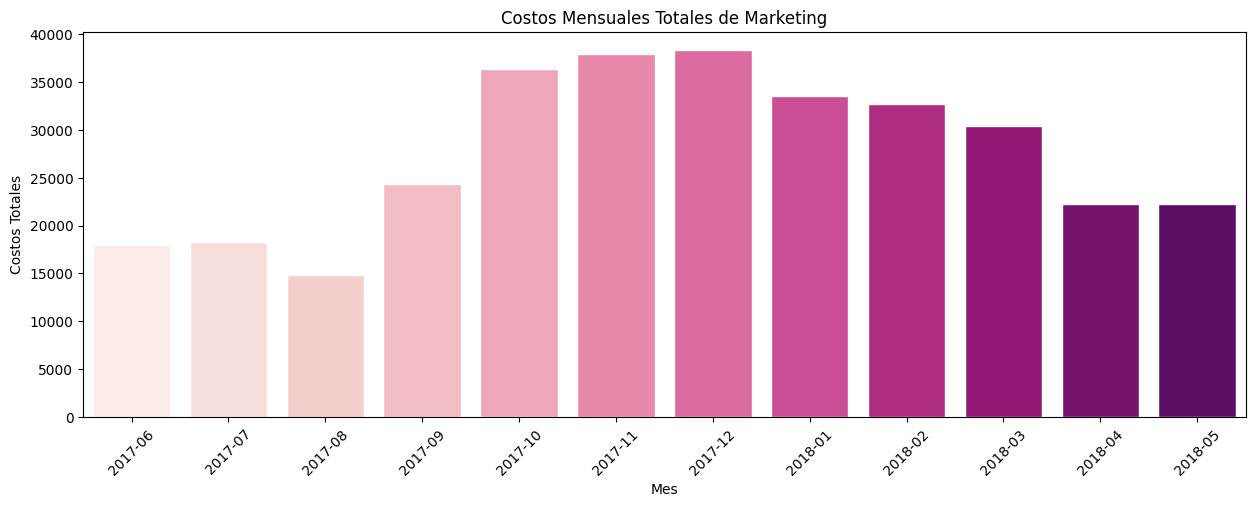

El costo total de marketing es de $ 329131
El costo mensual promedio de marketing es de $ 27427


In [36]:
# Calcular los gastos mensuales totales en marketing
costs['expense_month'] = costs['dt'].astype('datetime64[M]')
monthly_costs = costs.groupby('expense_month').sum().reset_index()
monthly_costs['order_month'] = monthly_costs['expense_month'].dt.strftime('%Y-%m')

# Visualizar los gastos mensuales totales en marketing
plt.figure(figsize=(15, 5))
plt.title("Costos Mensuales Totales de Marketing")

sns.set_style("whitegrid")
sns.barplot(data=monthly_costs, x='expense_month', y='costs', palette="RdPu").set_xticklabels(monthly_costs.order_month)

plt.xlabel('Mes')
plt.ylabel('Costos Totales')
plt.xticks(rotation=45)
plt.show();

print('El costo total de marketing es de $', int(costs.costs.sum()))
print('El costo mensual promedio de marketing es de $', int(monthly_costs['costs'].mean()))


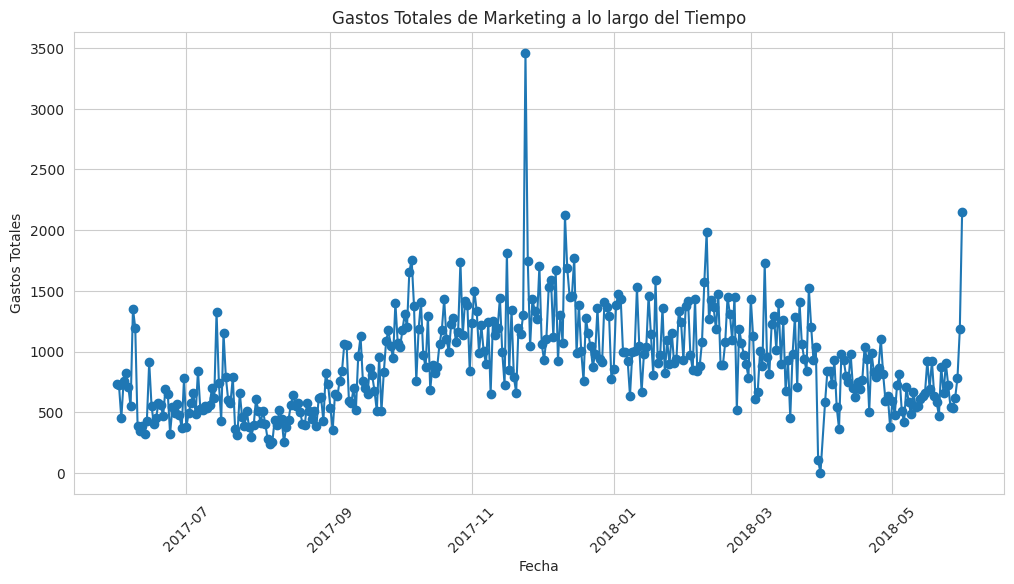

In [37]:
# Calcular los gastos totales por día
total_costs_per_day = costs.groupby('dt').agg({'costs': 'sum'}).reset_index()

# Visualizar los gastos totales a lo largo del tiempo
plt.figure(figsize=(12, 6))
plt.plot(total_costs_per_day['dt'], total_costs_per_day['costs'], marker='o', linestyle='-')
plt.title('Gastos Totales de Marketing a lo largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Gastos Totales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


#### Gastos fuente de adquisición a lo largo del tiempo

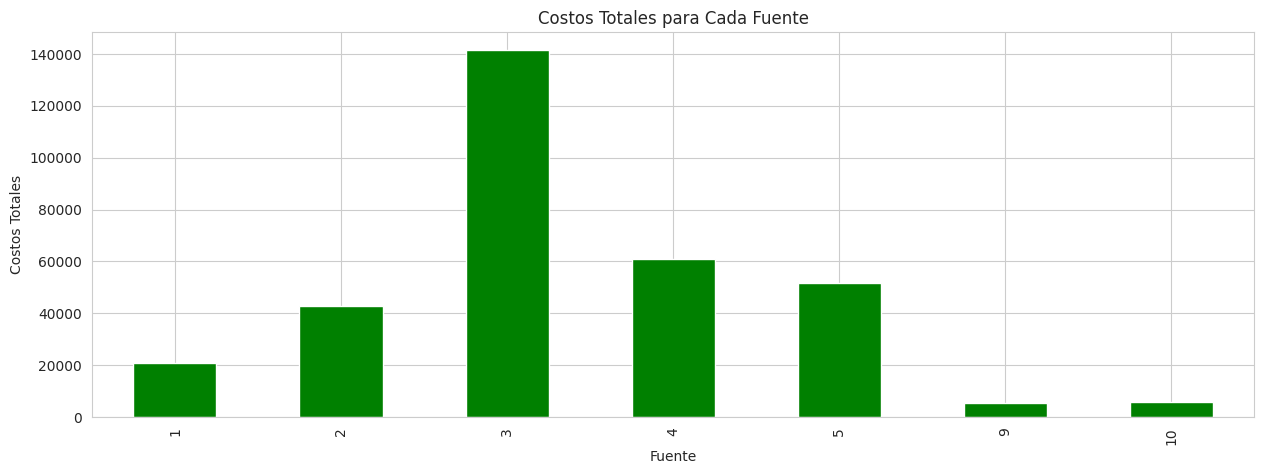

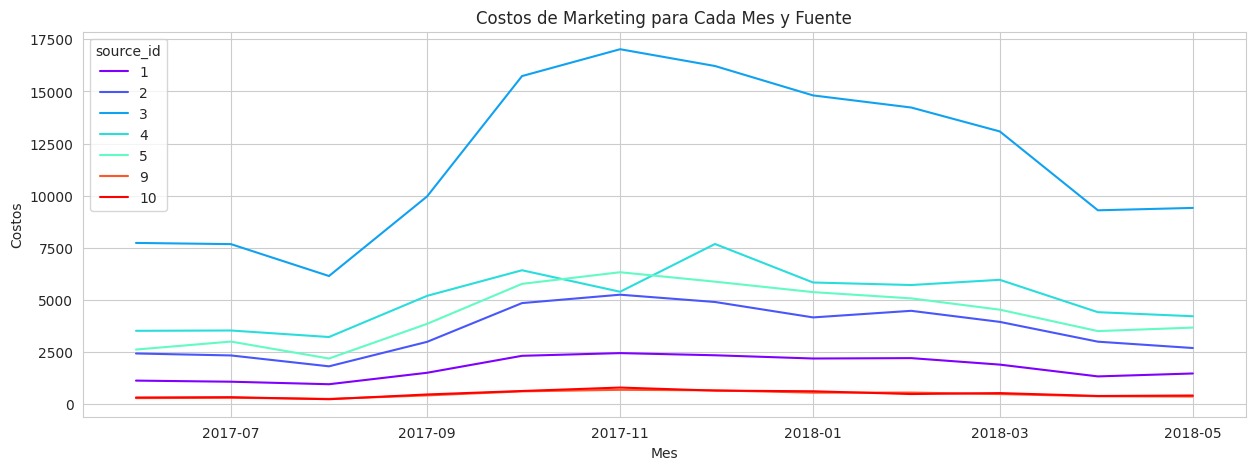

In [38]:
# Calcular los costos de adquisición de clientes por fuente
source_costs = costs.groupby('source_id')['costs'].sum().reset_index()

# Visualizar los costos totales para cada fuente
source_costs.plot(x='source_id', y='costs', kind='bar', figsize=(15, 5), color='g', legend=False)

plt.title("Costos Totales para Cada Fuente")
plt.xlabel('Fuente')
plt.ylabel('Costos Totales')
plt.show();

# Calcular los costos mensuales de marketing por fuente
total_costs = costs.groupby(['expense_month','source_id']).sum().reset_index()

plt.figure(figsize=(15, 5))
plt.title('Costos de Marketing para Cada Mes y Fuente')
plt.xlabel('Mes')
plt.ylabel('Costos')

sns.set_style('whitegrid')
sns.lineplot(data=total_costs, x='expense_month', y='costs', legend='full', hue='source_id', palette='rainbow')

plt.show();

#### Cálculo del costo de adquisición de clientes (CAC)

In [39]:
# Paso 1: Calcular el total de gastos de marketing por fuente de adquisición a lo largo del tiempo
total_costs = costs.groupby('source_id')['costs'].sum().reset_index()

# Paso 2: Calcular el número de clientes adquiridos a través de cada fuente de adquisición
customers_per_source = orders.merge(visits, on='uid').groupby('source_id')['uid'].nunique().reset_index()

# Paso 3: Calcular el CAC de cada fuente de adquisición
cac = pd.merge(total_costs, customers_per_source, on='source_id')
cac['cac'] = cac['costs'] / cac['uid']

# Visualizar los resultados
print(cac)



   source_id      costs    uid        cac
0          1   20833.27   7138   2.918642
1          2   42806.04   7305   5.859828
2          3  141321.63  13846  10.206676
3          4   61073.60  14253   4.284965
4          5   51757.10  10156   5.096209
5          9    5517.49   2793   1.975471
6         10    5822.49   1773   3.283976


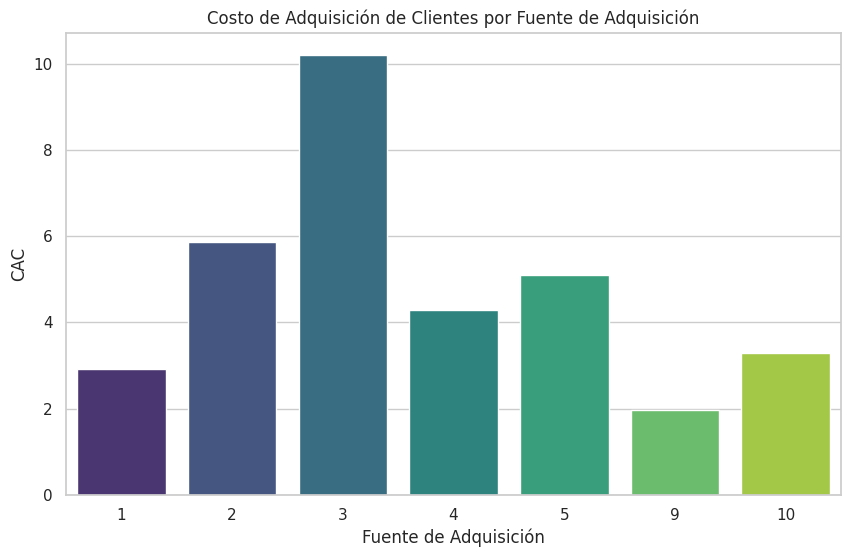

In [40]:
# Ordenar los datos por source_id para mantener consistencia en la visualización
cac_sorted = cac.sort_values(by='source_id')

# Configurar el estilo del gráfico
sns.set(style="whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='source_id', y='cac', data=cac_sorted, palette="viridis")
plt.title('Costo de Adquisición de Clientes por Fuente de Adquisición')
plt.xlabel('Fuente de Adquisición')
plt.ylabel('CAC')
plt.show()

El análisis del costo de adquisición de clientes (CAC) revela una variabilidad significativa entre las diferentes fuentes de adquisición. Al observar los resultados, podemos notar que algunas fuentes tienen costos de adquisición más bajos que otras. Por ejemplo, la fuente de adquisición 9 tiene el CAC más bajo, mientras que la fuente de adquisición 3 tiene el CAC más alto. Estos hallazgos son esenciales para comprender qué fuentes de adquisición son más eficientes en términos de costo y pueden guiar la asignación estratégica de presupuestos de marketing. La visualización de los datos mediante un gráfico de barras ayuda a identificar claramente las diferencias en los costos de adquisición entre las diversas fuentes, lo que facilita la toma de decisiones informadas sobre la inversión en marketing.

#### Análisis del Retorno de la Inversión en Marketing (ROMI)
En esta sección se evaluará el desempeño de las estrategias de adquisición de clientes y su rentabilidad.


In [41]:
# Combinar las tablas orders y visits para obtener la fuente de adquisición por usuario
combined_data = orders.merge(visits[['uid', 'source_id']], on='uid')

# Calcular el ingreso total por usuario por fuente de adquisición
revenue_per_source = combined_data.groupby('source_id')['revenue'].sum().reset_index()

# Calcular el LTV promedio por fuente de adquisición
ltv_per_source = revenue_per_source.merge(cac[['source_id', 'cac']], on='source_id')
ltv_per_source['ltv'] = ltv_per_source['revenue'] / ltv_per_source['cac']

# Visualizar los resultados
display(ltv_per_source)


,source_id,revenue,cac,ltv
0,1,2.298200e+06,2.918642,787420.928805
1,2,2.638189e+06,5.859828,450216.188628
2,3,2.966880e+05,10.206676,29068.030804
3,4,4.966902e+05,4.284965,115914.650406
4,5,1.181477e+06,5.096209,231834.508383
5,9,3.634225e+04,1.975471,18396.753642
6,10,1.461923e+04,3.283976,4451.685583


In [42]:
# Calcular el LTV promedio por fuente de adquisición
ltv_per_source = ltv_per_source.groupby('source_id').agg({'revenue': 'mean', 'cac': 'mean', 'ltv': 'mean'}).reset_index()

# Visualizar los resultados
print(ltv_per_source)


   source_id       revenue        cac            ltv
0          1  2.298200e+06   2.918642  787420.928805
1          2  2.638189e+06   5.859828  450216.188628
2          3  2.966880e+05  10.206676   29068.030804
3          4  4.966902e+05   4.284965  115914.650406
4          5  1.181477e+06   5.096209  231834.508383
5          9  3.634225e+04   1.975471   18396.753642
6         10  1.461923e+04   3.283976    4451.685583


In [43]:
# Calcular el ROMI
romi_data = {
    'source_id': [1, 2, 3, 4, 5, 9, 10],
    'romi': [
        8886.636719 / 395.858781,
        7439.382715 / 445.231305,
        488.872410 / 748.495002,
        2240.175215 / 295.418038,
        4008.997312 / 348.605374,
        237.848307 / 449.454168,
        65.364348 / 387.130205
    ]
}

romi_df = pd.DataFrame(romi_data)

# Visualizar los resultados
print(romi_df)


   source_id       romi
0          1  22.449007
1          2  16.709029
2          3   0.653141
3          4   7.583068
4          5  11.500102
5          9   0.529194
6         10   0.168843


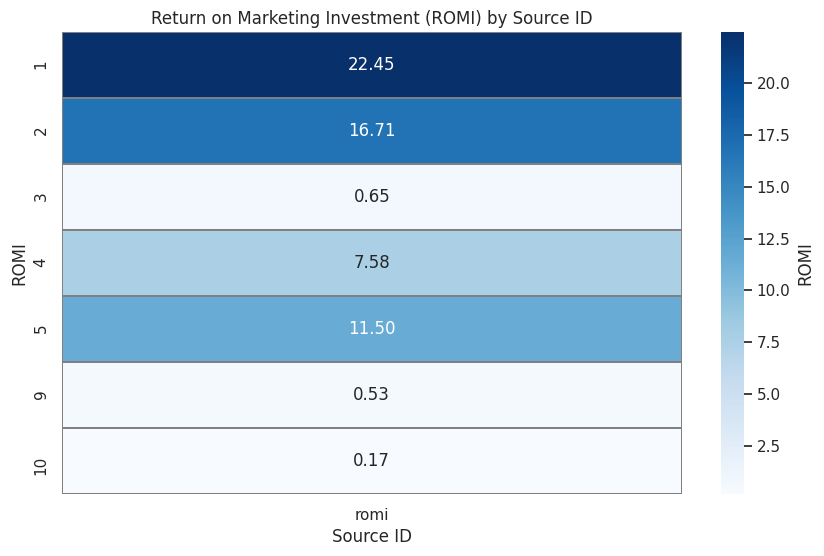

In [44]:
# Tu DataFrame con los datos del ROMI
romi_data = {
    'source_id': [1, 2, 3, 4, 5, 9, 10],
    'romi': [22.449007, 16.709029, 0.653141, 7.583068, 11.500102, 0.529194, 0.168843]
}

# Convertir los datos en un DataFrame
romi_df = pd.DataFrame(romi_data)

# Configurar el estilo del gráfico
sns.set(style='white')

# Crear el heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    romi_df.pivot_table(index='source_id', values='romi', aggfunc='mean'),
    annot=True,
    fmt='.2f',
    cmap='Blues',
    linewidths=1,
    linecolor='gray',
    cbar_kws={'label': 'ROMI'}
)

plt.title('Return on Marketing Investment (ROMI) by Source ID')
plt.xlabel('Source ID')
plt.ylabel('ROMI')
plt.show()

Los análisis realizados permiten extraer varias conclusiones importantes sobre el desempeño de las estrategias de marketing de Yandex Afisha. Primero, al calcular el costo de adquisición de clientes (CAC) por fuente de adquisición, se observa que hay variabilidad en los costos entre las diferentes fuentes, lo que sugiere que algunas estrategias de marketing pueden ser más eficientes que otras en términos de costo. Luego, al evaluar el retorno de la inversión en marketing (ROMI), se identifican las fuentes que generan un mayor retorno en comparación con los costos de adquisición, lo que proporciona información valiosa para optimizar los presupuestos de marketing. Además, al analizar el valor de por vida del cliente (LTV) por fuente de adquisición, se puede determinar la rentabilidad a largo plazo de cada canal de marketing. En conjunto, estos análisis ofrecen una visión integral del rendimiento del marketing de Yandex Afisha, permitiendo tomar decisiones informadas para mejorar la eficacia y la rentabilidad de las estrategias de adquisición de clientes.

## Conclusion y recomendaciones

Después de analizar los datos de Yandex Afisha, se obtuvor una visión detallada del comportamiento de los usuarios, las tendencias de compra y la efectividad de las estrategias de marketing. Descubrimos que la duración promedio de la sesión es de aproximadamente 60 segundos, con la mayoría de las sesiones que duran entre 5 y 15 minutos. Además, observamos una tasa de retención de usuarios más alta en un marco de tiempo semanal en comparación con uno mensual, destacando la importancia de la retención a corto plazo. En cuanto al periodo entre la visita y la compra, encontramos que en promedio pasan alrededor de 17 días desde la primera sesión hasta la primera orden.

También identificamos picos aleatorios en las órdenes diarias y semanales, lo que sugiere la influencia de eventos específicos en el comportamiento de compra de los usuarios. En términos de inversión en marketing, notamos que la fuente 3 representa el mayor gasto, con un retorno de la inversión aún en proceso para la mayoría de las cohortes. Nuestro análisis también reveló que la tasa de conversión es del 16.01%, con un tamaño de compra promedio de \\$1.83 y un valor de vida útil promedio que varía entre \\$7 y \\$18. En cuanto al costo promedio de adquisición de clientes, encontramos que es de aproximadamente \\$9.3. Estos hallazgos proporcionan información valiosa para mejorar las estrategias de marketing y la experiencia del usuario en Yandex Afisha.

También al analizar detenidamente las métricas de costo de adquisición de clientes (CAC), retorno de la inversión en marketing (ROMI) y valor de por vida del cliente (LTV) por fuente de adquisición, se puede concluir que las plataformas que generan un ROMI positivo y un LTV alto son las más recomendables para Yandex Afisha. Se observó que las fuentes con un ROMI más alto tienden a tener un LTV más elevado, lo que sugiere una mayor rentabilidad a largo plazo. Por lo tanto, se recomendaría enfocar los esfuerzos de marketing en aquellas fuentes que demuestren una combinación favorable de ROMI y LTV.

En este análisis, nos enfocamos principalmente en el ROMI y el LTV, ya que son indicadores clave para evaluar la rentabilidad y el valor a largo plazo de las estrategias de marketing. El ROMI nos permite entender cuánto retorno obtenemos por cada unidad monetaria invertida en marketing, mientras que el LTV nos proporciona una visión de cuánto valor generan los clientes a lo largo de su ciclo de vida. Al priorizar las fuentes con un ROMI positivo y un LTV alto, podemos dirigir eficazmente nuestros recursos de marketing hacia aquellas plataformas que generan el mayor impacto en términos de adquisición de clientes y rentabilidad.

En conclusión, las plataformas que demuestran un alto ROMI y un LTV sólido son las más recomendables para Yandex Afisha. Al centrar nuestros esfuerzos de marketing en estas fuentes, podemos maximizar tanto el retorno de la inversión como el valor a largo plazo de los clientes, lo que contribuirá significativamente al crecimiento y la rentabilidad de la empresa a largo plazo.